# T cells mapped to T2T version 2.0
# Day 6 post EP for CRISPoff and unedited
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Date: Aug. 12, 2025
Modify the window of the input size

Save subsets of reads

In [1]:

import sys
from pathlib import Path
from datetime import datetime

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated,
    subset_BAM_by_read_IDs,
    bam_to_sam,
    plot_bam_quality_metrics
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

modkit found with expected version 0.2.4


In [2]:
system_info()
date_today = datetime.today().strftime('%Y-%m-%d')
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
reg_genome_version = "t2t_v2_0"
region_chr = 'chr1'

# 6500bps: EXACT cutting region  
# chr1:206,583,334-206,589,873
region_start = 206583334    + 20
region_end = 206589874      - 20 
# CD55 TSS start: chr1:206586828-206606065 (+)
# (before TSS: 3474, after TSS: 3026 bps)

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}') 

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

# Look at UNEDITED (NT = Not Treated) T cells at day 6 post EP (with no proteins)


In [3]:
unedit_bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# day 6:  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
unedit_bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

experiment_name =  day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merg…

          |    0%

          | Transferring 53 from reads.CG,0.txt into reads.combined_basemods.h5, new size 53   0% | 00:00<?

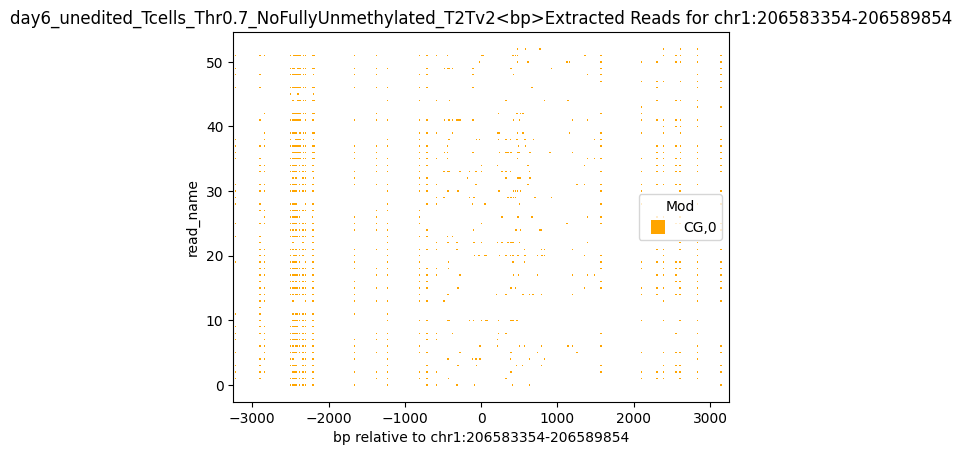

Found read coordinates: 53 reads
Unique read names with methylation: 53
Found 26 reads with full coverage
Reads with methylation data: 53
Overlap between full coverage and methylation: 26
After full coverage filtering: 662 reads with methylation data
Final result: 662 reads with methylation information out of 53 total reads


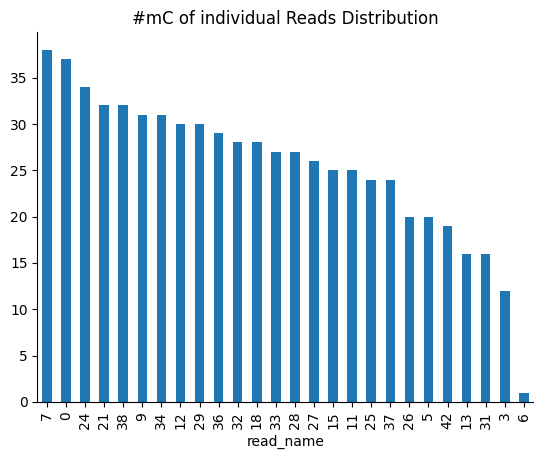

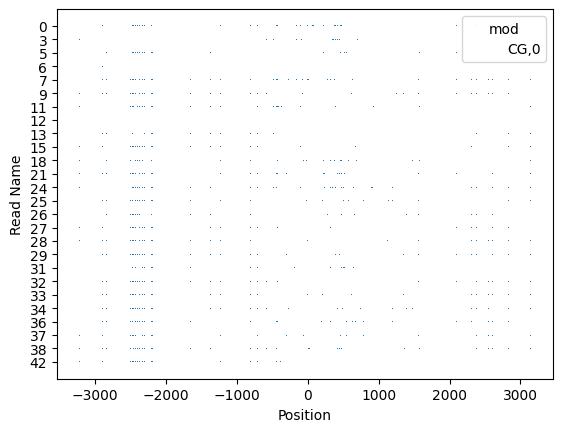

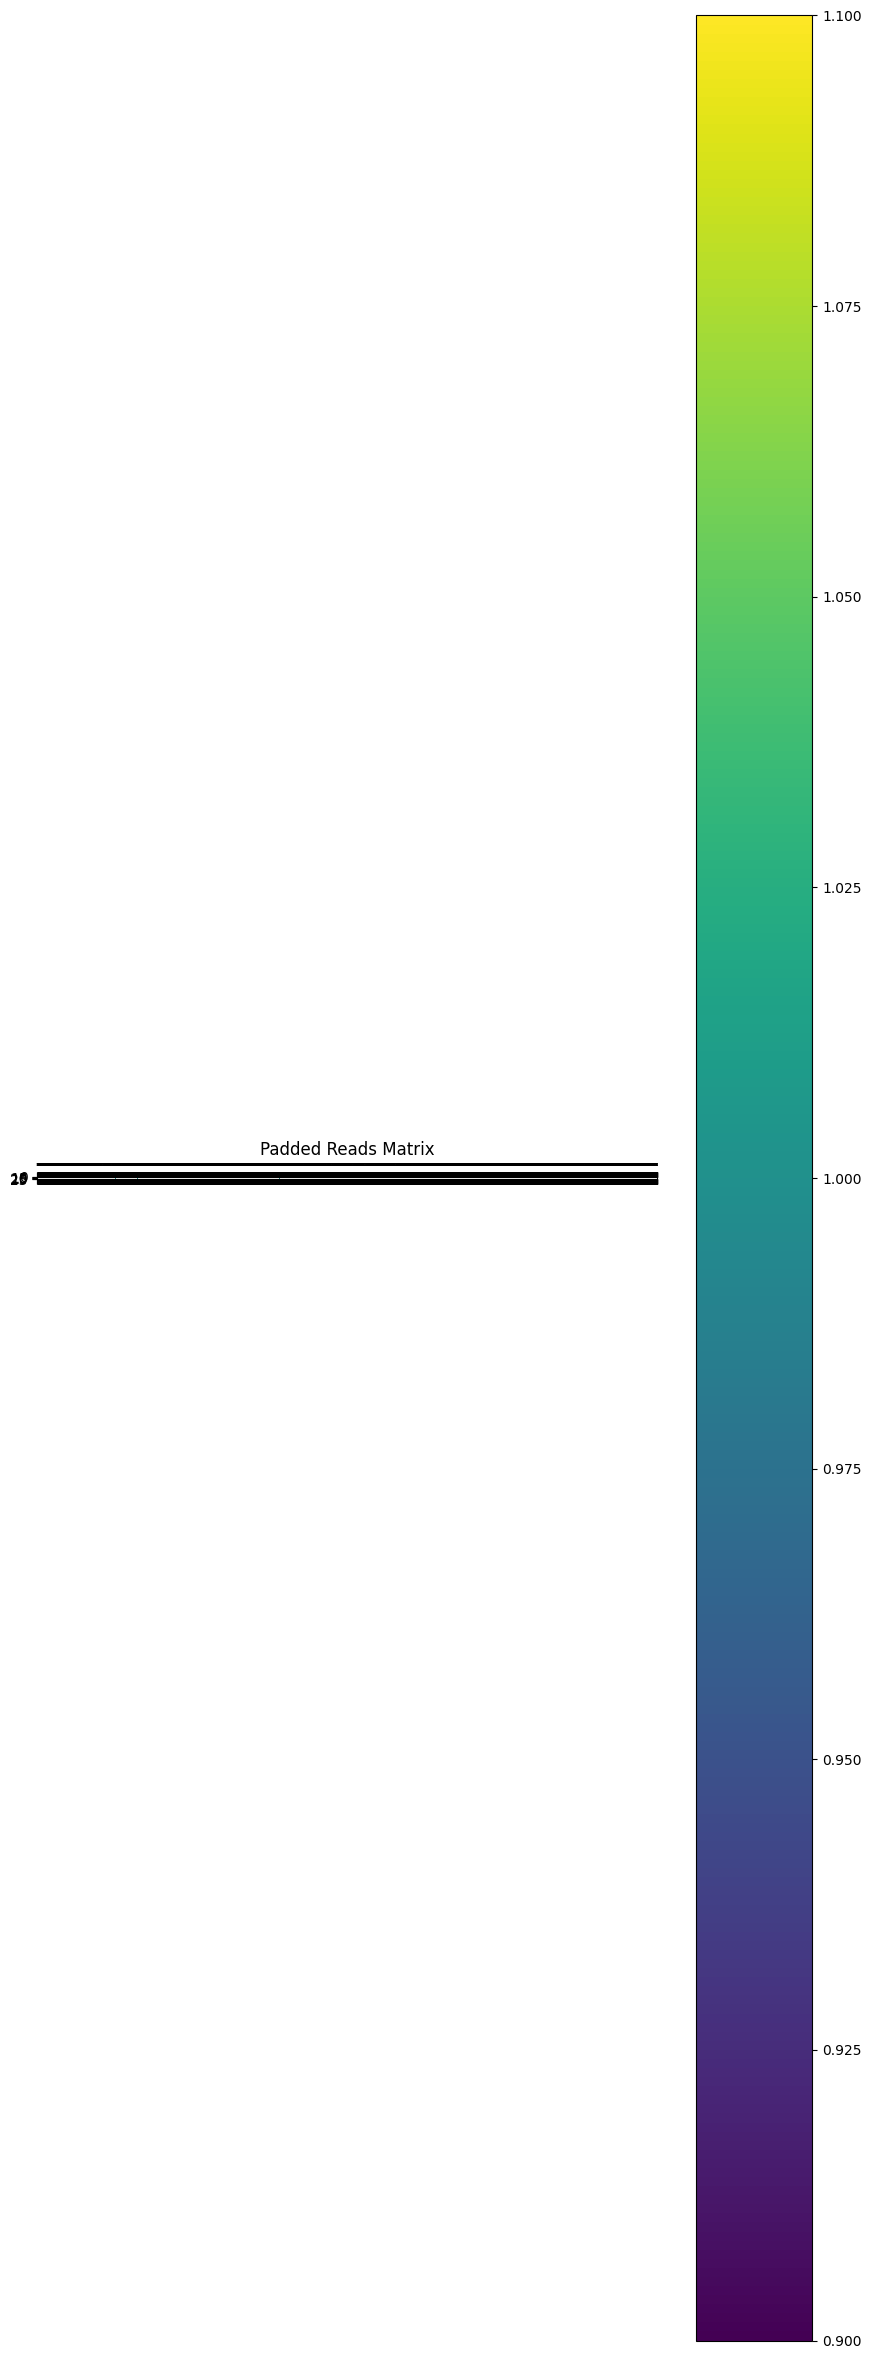

Padded reads saved to padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-12.npy
Padded reads loaded successfully.


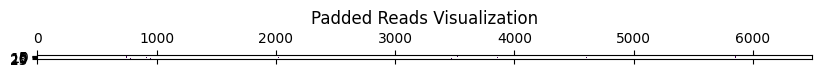

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

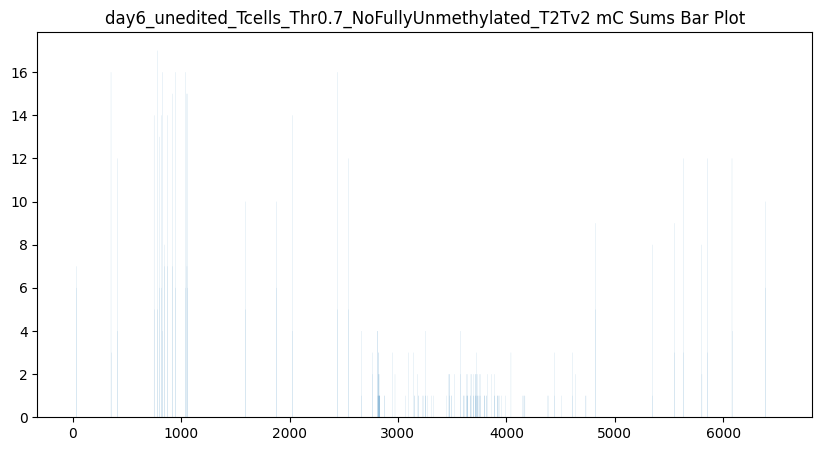

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


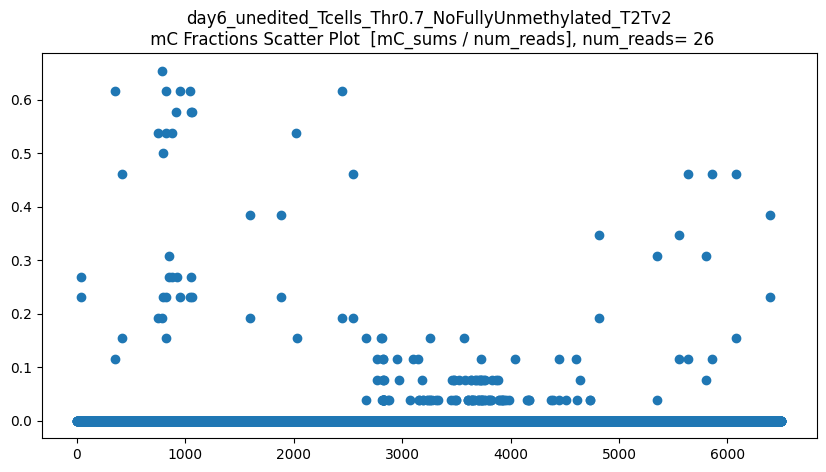

len(CGs_all) = 26
CGs_all.shape = (26, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


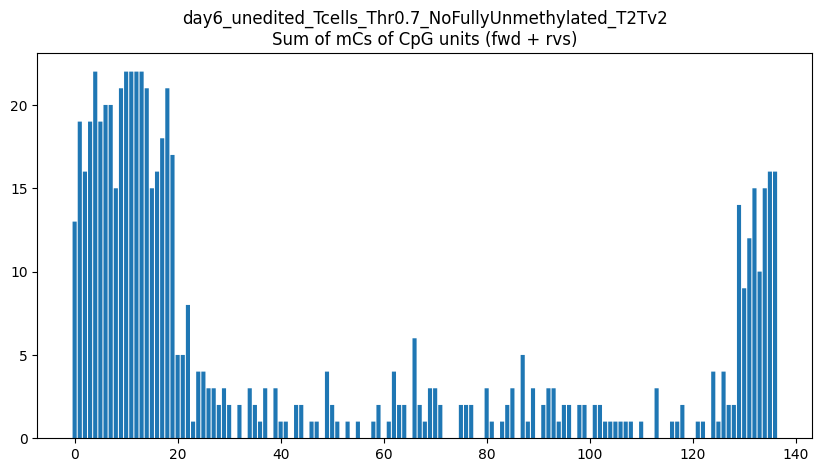

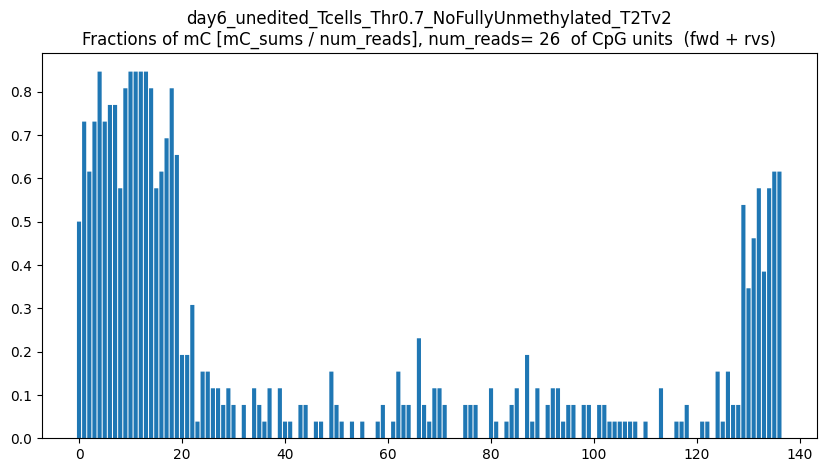

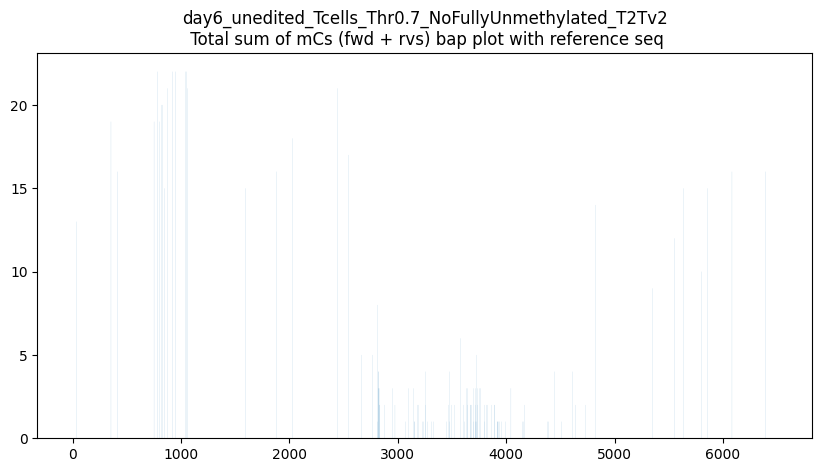

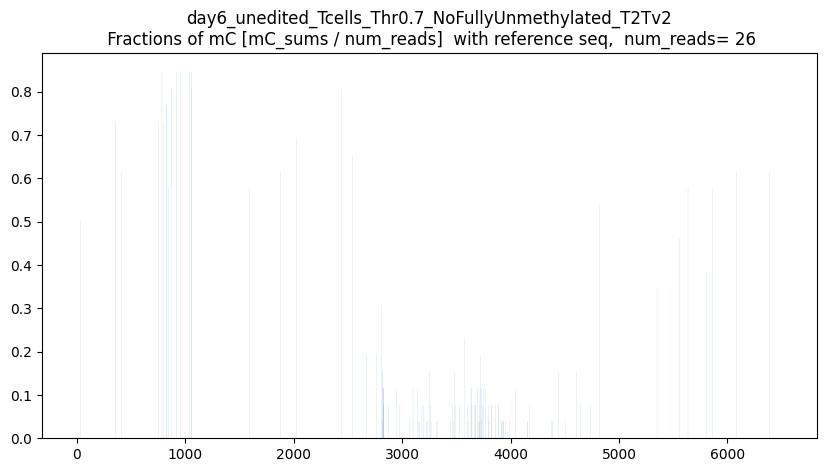

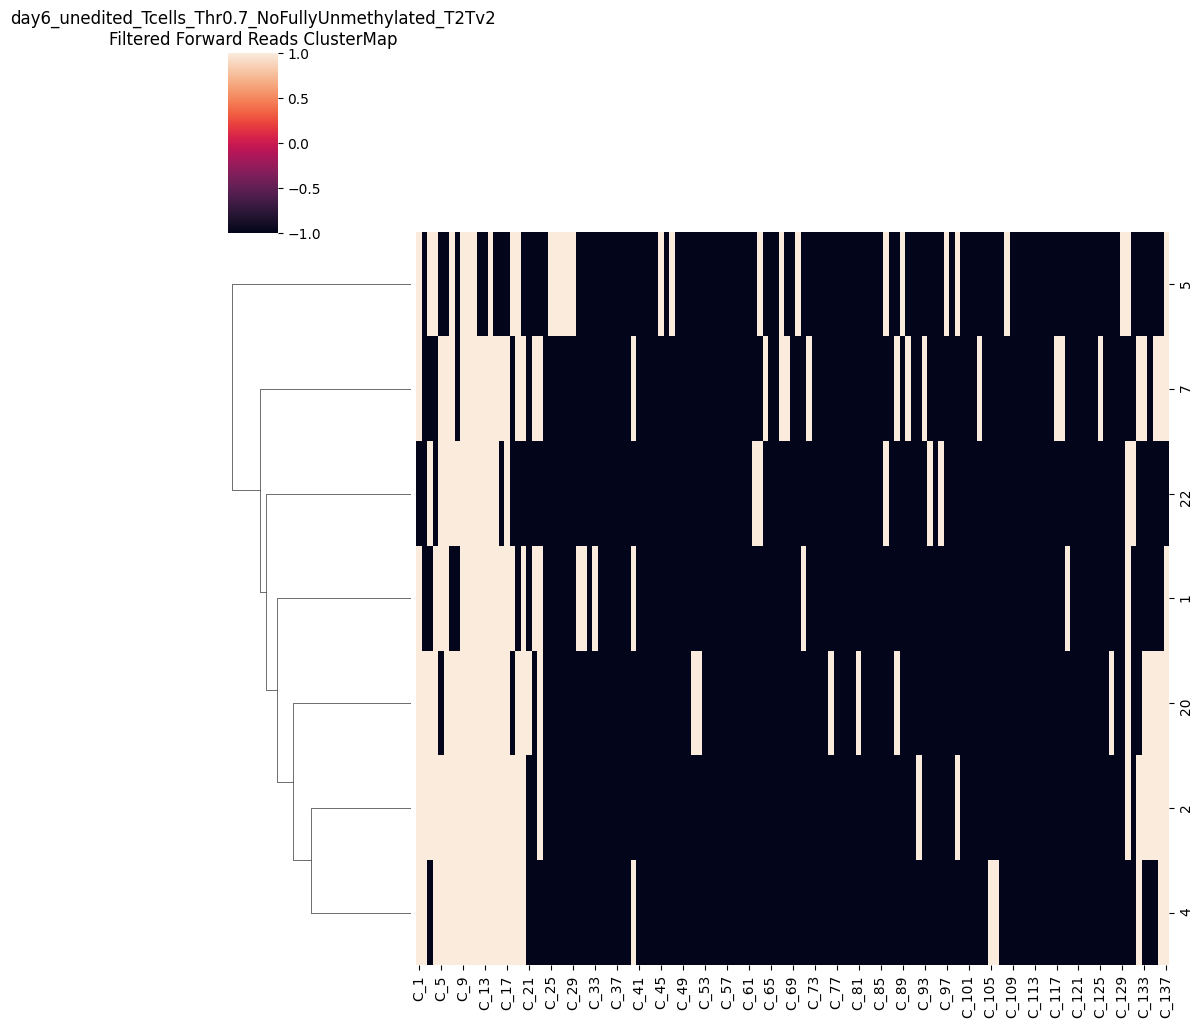

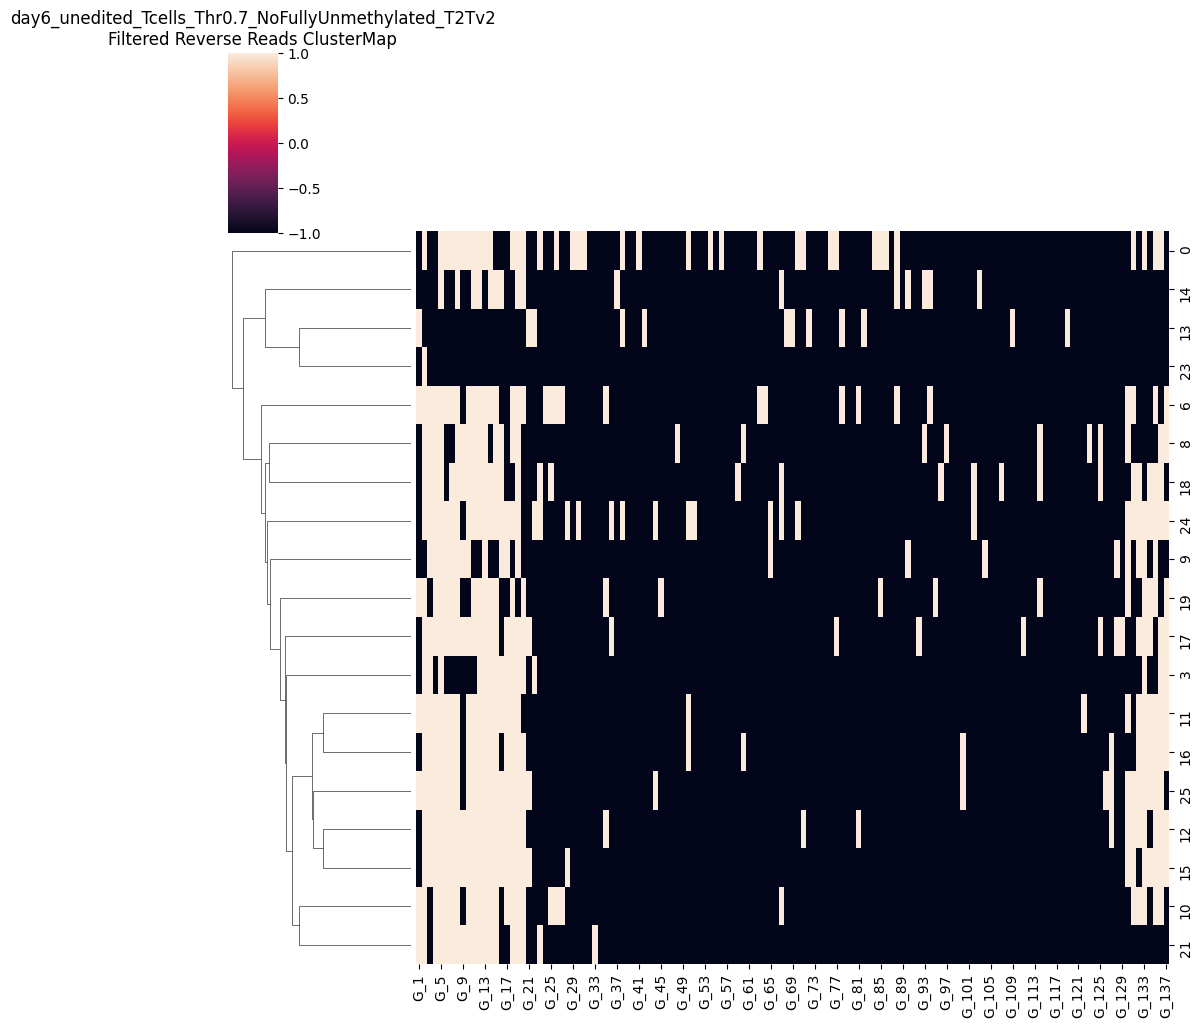

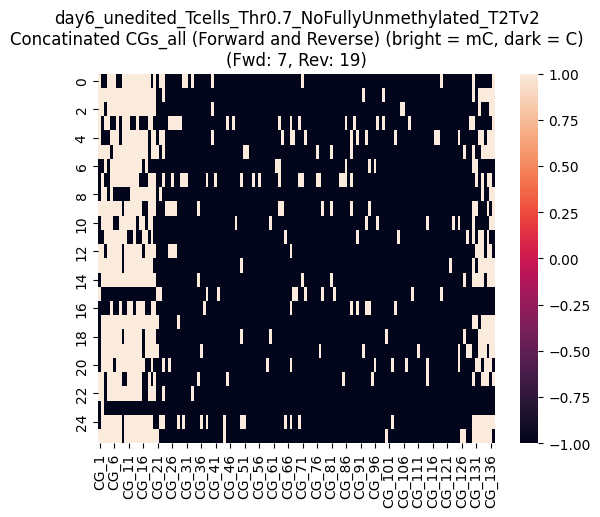

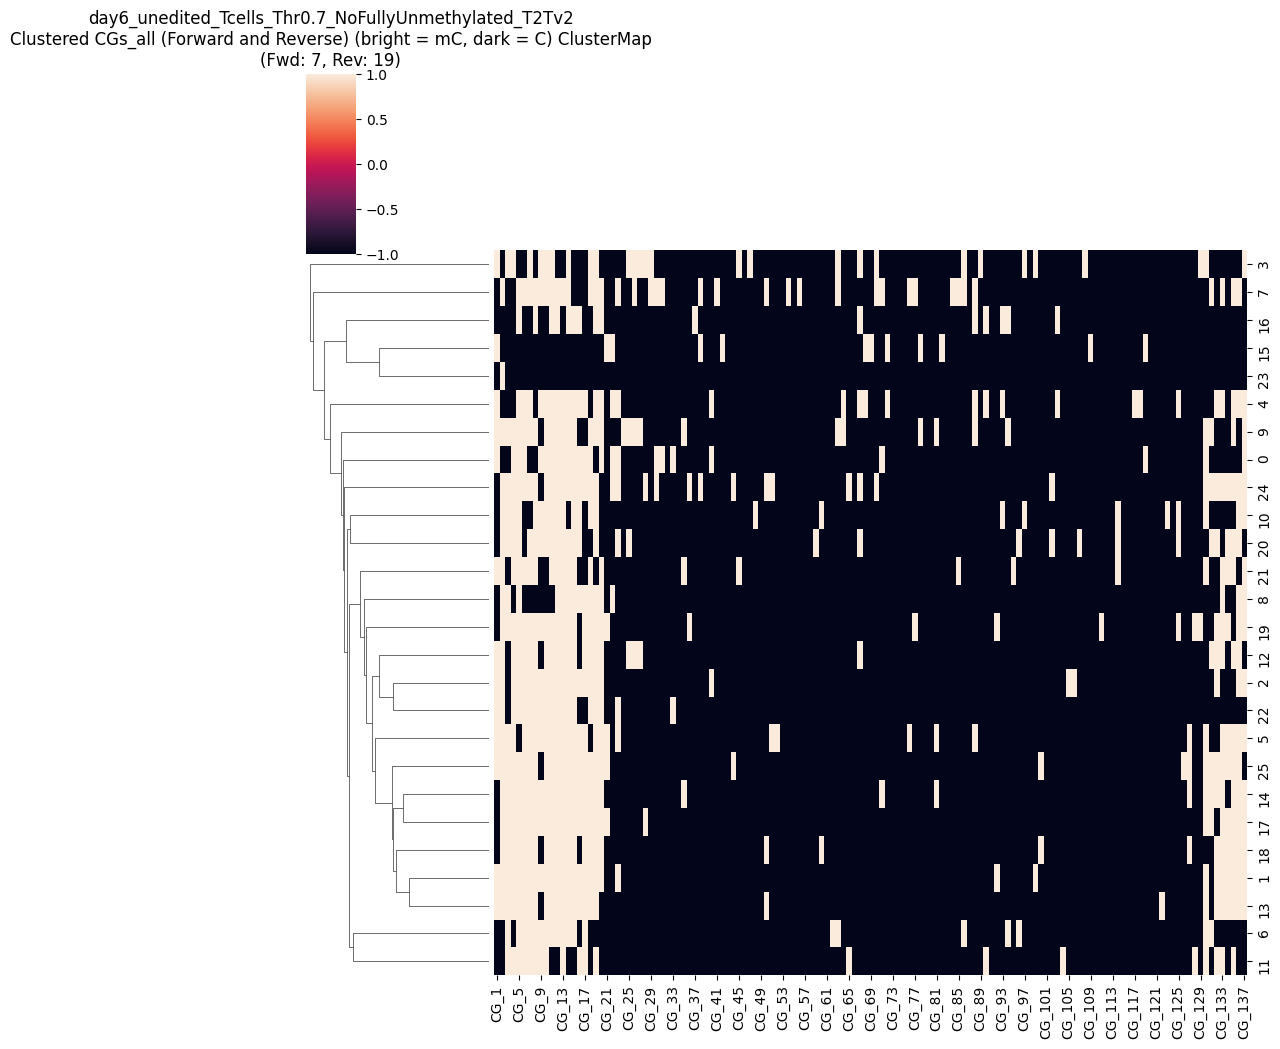

CGs_all saved as CG_137_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-12_units_combined_numFWD7_numRVS19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [4]:


threshold_mC =  0.7 #  0.9 #0.99
experiment_name = "day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2"
bam_path = unedit_bam_path

print('experiment_name = ', experiment_name)

save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [4]:
reads_df

NameError: name 'reads_df' is not defined

In [6]:
threshold_percent = 50
filtered_reads_df, methylation_counts, removed_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 27.0
Maximum methylated CGs per read: 38.0
Threshold (50% of max): 13.50
Original number of reads: 26
Number of reads after filtering: 24
Removed 2 reads


read_name_str read_name read_id_number   mod  \
0     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
1     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
2     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
3     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
4     cef5fedc-e0a5-4985-a16e-fc653e9edbc0         0              0  CG,0   
...                                    ...       ...            ...   ...   
1031  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1032  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1033  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1034  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   
1035  529776d8-0c7e-415f-94fc-99c5f825ed66        42             42  CG,0   

       pos  pos_shifted  num_CG_methylated  
0    -2897          353                1.0  
1    -2467          783                1.0  
2    -2453          797                1.0  
3    -2428          822                1.0  
4    -2426          824                1.0  
...    ...          ...                ...  
1031 -1225         2025                1.0  
1032  -807         2443                1.0  
1033  -708         2542                1.0  
1034  -441         2809                1.0  
1035  -377         2873                1.0  

[649 rows x 7 columns]

In [7]:
removed_reads_df

read_name_str read_name read_id_number   mod  \
86   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
87   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
88   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
89   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
90   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
91   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
92   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
93   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
94   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
95   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
96   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
97   e3131115-5c28-43d6-bed4-c0c3d85dc1e8         3              3  CG,0   
146  44c32adc-5f73-4b85-95eb-e4caa5173cf8         6              6  CG,0   

      pos  pos_shifted  num_CG_methylated  
86  -3217           33                1.0  
87   -584         2666                1.0  
88   -484         2766                1.0  
89   -151         3099                1.0  
90    -94         3156                1.0  
91    353         3603                1.0  
92    361         3611                1.0  
93    393         3643                1.0  
94    427         3677                1.0  
95    451         3701                1.0  
96    706         3956                1.0  
97    921         4171                1.0  
146 -2897          353                1.0

In [8]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [9]:
output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
output_bam_path=Path(output_dir_path, removed_reads_bam_name)
output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam')

In [10]:
subset_BAM_by_read_IDs(bam_path, removed_reads_df, output_bam_path=output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam')

In [11]:
sam_path = bam_to_sam(output_bam_path, sam_path=None)
sam_path

Converted BAM → SAM: /home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.sam


PosixPath('/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.sam')

In [5]:
removed_reads_bam_path= '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
removed_reads_bam_path

'/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'

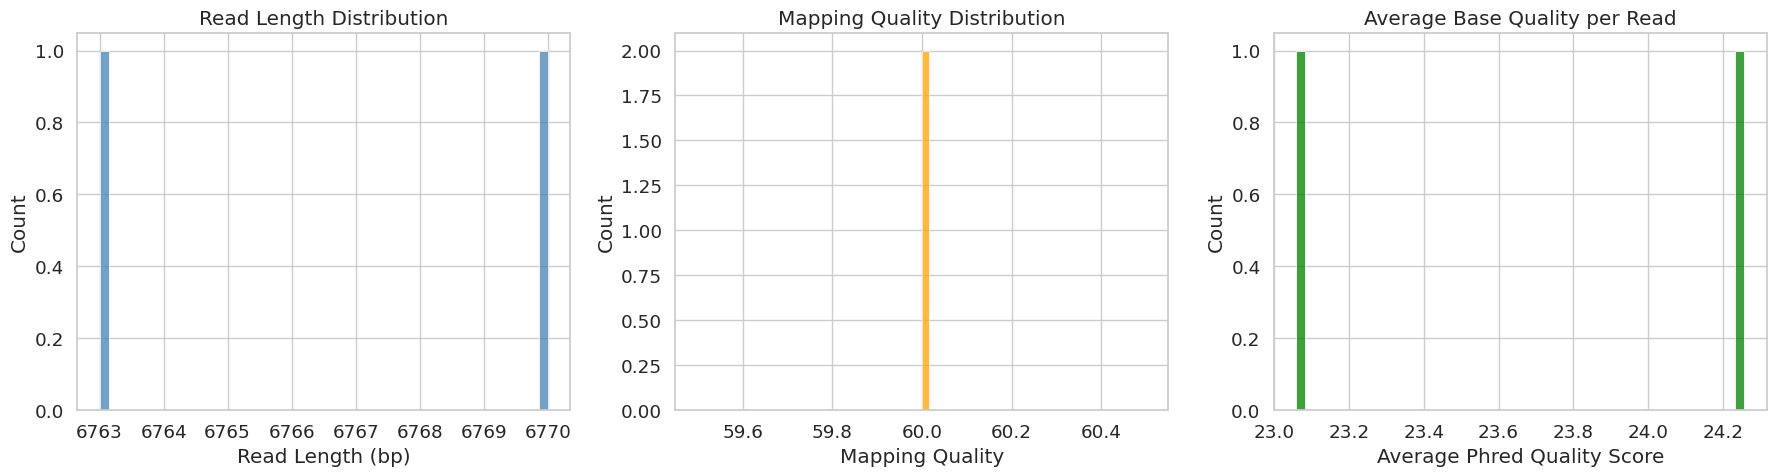

Total reads processed: 2


In [6]:
plot_bam_quality_metrics(removed_reads_bam_path)

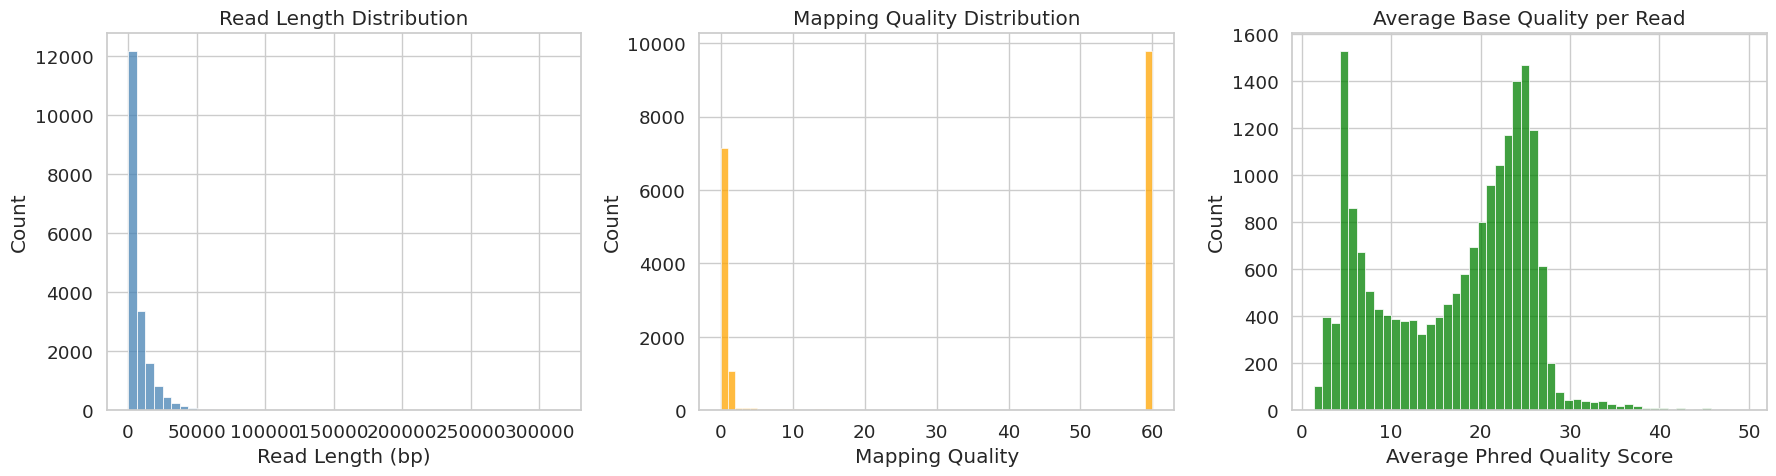

Total reads processed: 19039


In [7]:
plot_bam_quality_metrics(unedit_bam_path)

In [ ]:
methylation_counts

In [ ]:
visualize_data(reads_df)
visualize_data(filtered_reads_df)

In [ ]:
methylation_counts['methylation_count'].max()

In [ ]:
mean_methylation = methylation_counts['methylation_count'].mean()
mean_methylation

In [ ]:
methylation_counts['methylation_count'].median()

In [12]:
threshold_percent 
threshold = mean_methylation * (threshold_percent / 100)

In [ ]:
save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)



In [ ]:

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [ ]:
CGs_all

In [16]:
# 70% * (mean)
# CGs_all

In [17]:
# CGs_all

# Look at the bigger Day 6 T cells data:

In [ ]:
unedit_bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# day 28: "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# day 6:  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
unedit_bam_path

In [ ]:
threshold_mC = 0.995 #0.7 #  0.9 #0.99
experiment_name = "day28_unedited_Tcells_Thr"+str(threshold_mC)+"_NoFullyUnmethylated_T2Tv2"
bam_path = unedit_bam_path

print('experiment_name = ', experiment_name)

save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [ ]:

CGs_all_unedited_original = CGs_all
CGs_all_unedited_original

In [ ]:
threshold_percent = 50
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

In [ ]:
save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [ ]:
CGs_all_unedited_remove_low50 = CGs_all
CGs_all_unedited_remove_low50

# remove <70% * mean

In [ ]:
threshold_percent = 70
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_unedited_remove_low70 = CGs_all
CGs_all_unedited_remove_low70

In [ ]:
threshold_percent = 80
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_unedited_remove_low80 = CGs_all
CGs_all_unedited_remove_low80

# Silenced data: Day 6 CRISPoff 

In [3]:
silenced_bam_path ="/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
silenced_bam_path

'/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

experiment_name =  day6_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.…

          |    0%

          | Transferring 10130 from reads.CG,0.txt into reads.combined_basemods.h5, new size 10130   0% | 00:0…

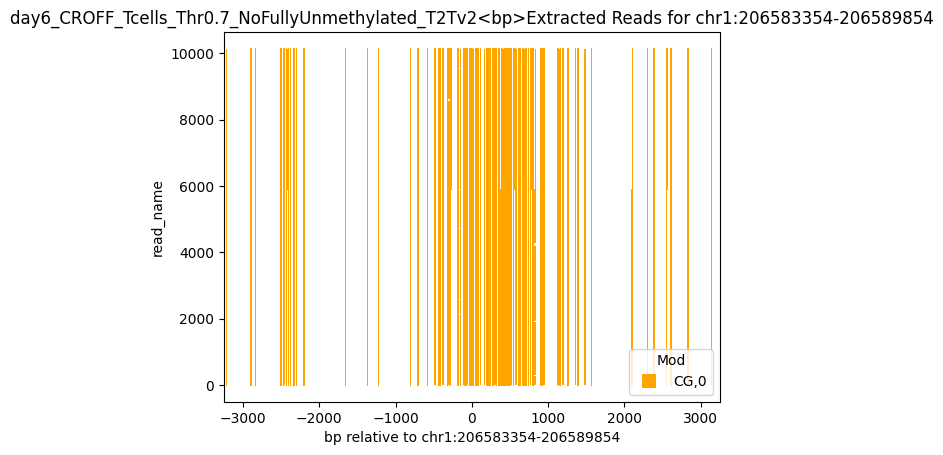

In [5]:
threshold_mC = 0.7 # 0.995 # 0.7 # 0.9 #0.99

experiment_name = "day6_CROFF_Tcells_Thr"+str(threshold_mC)+"_NoFullyUnmethylated_T2Tv2" 
print('experiment_name = ', experiment_name)

bam_path = silenced_bam_path


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

Found read coordinates: 10130 reads
Unique read names with methylation: 10082
Found 3453 reads with full coverage
Reads with methylation data: 10082
Overlap between full coverage and methylation: 3439
After full coverage filtering: 193215 reads with methylation data
Final result: 193215 reads with methylation information out of 10130 total reads


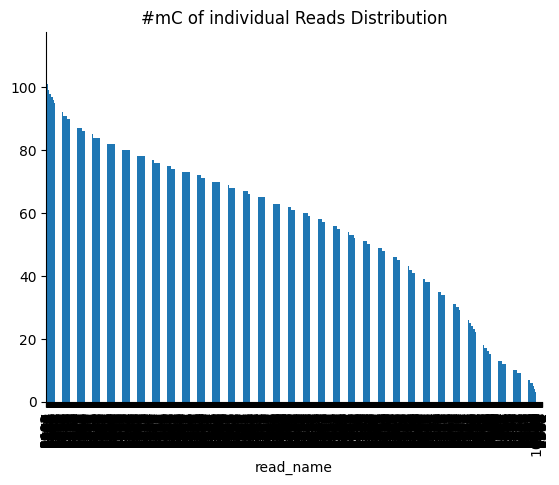

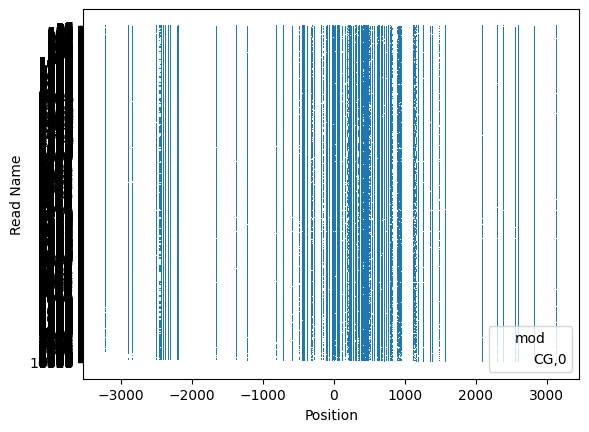

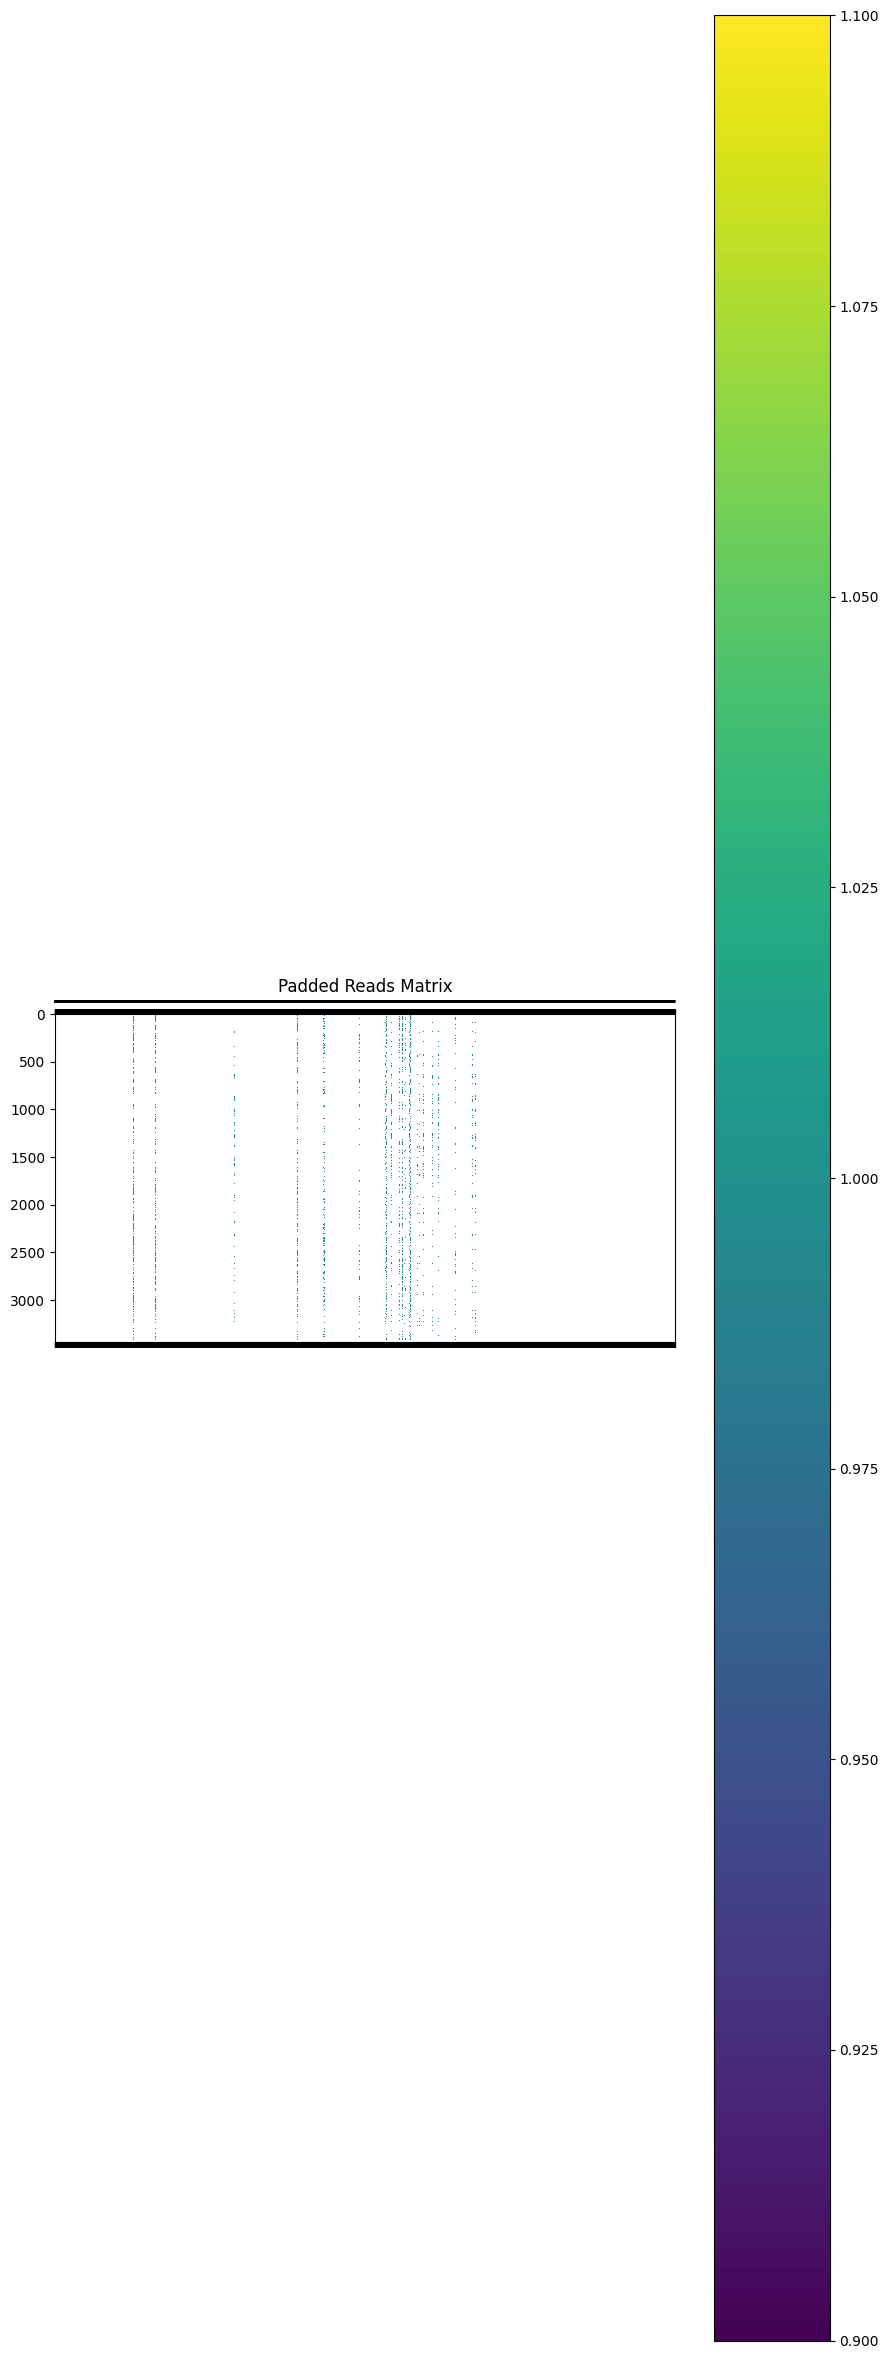

Padded reads saved to padded_reads_day6_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-12.npy
Padded reads loaded successfully.


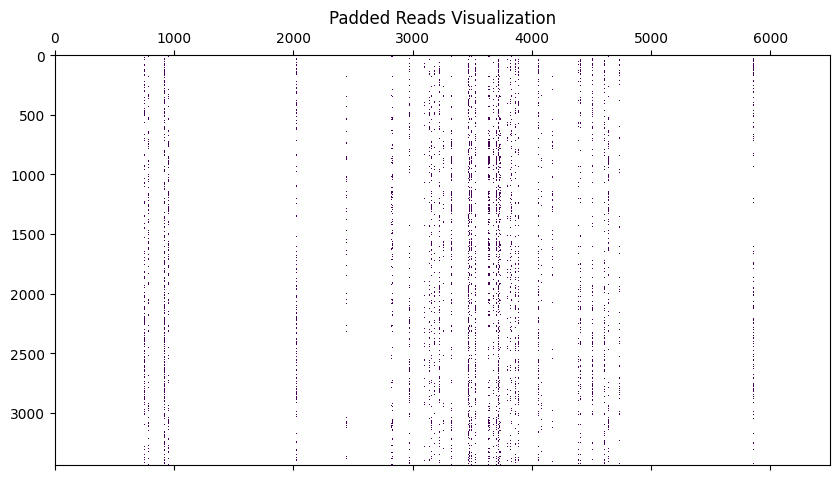

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

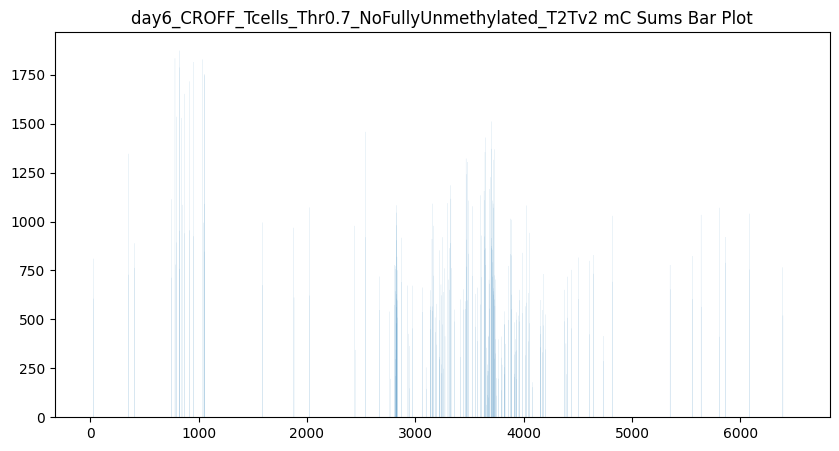

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


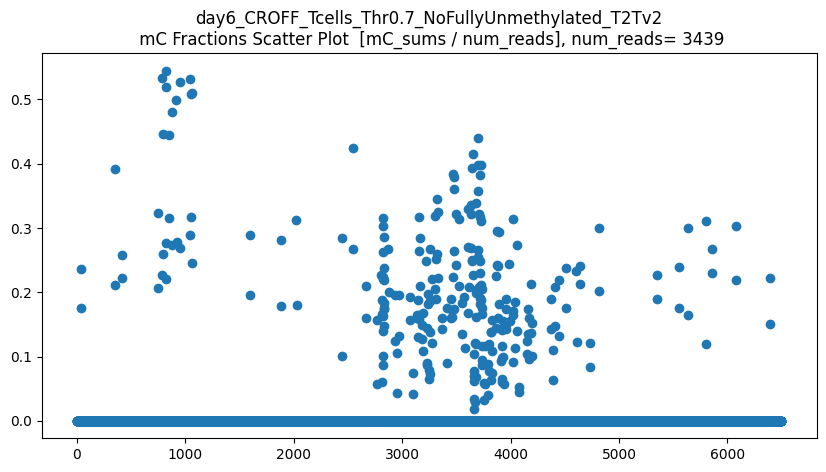

len(CGs_all) = 3439
CGs_all.shape = (3439, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


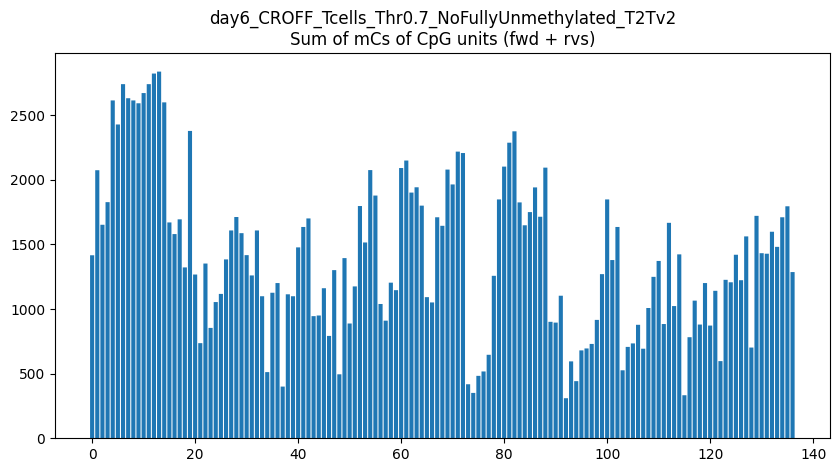

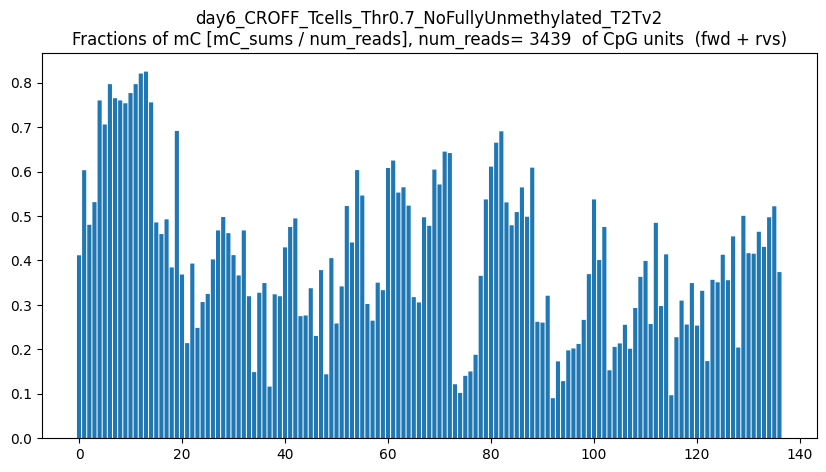

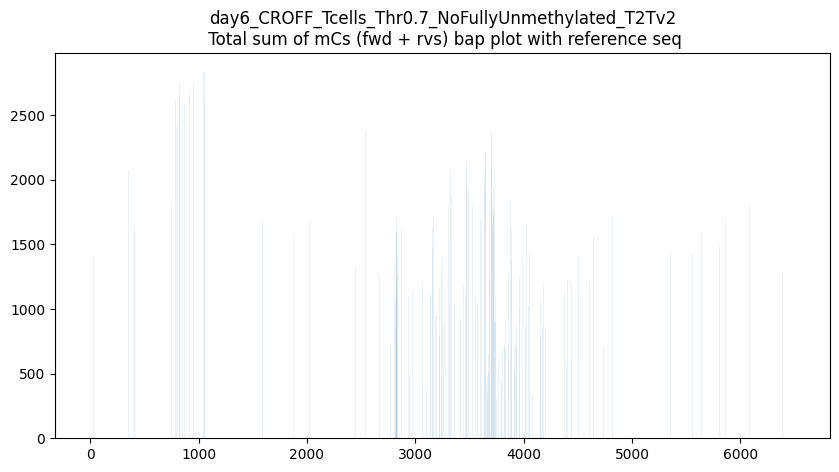

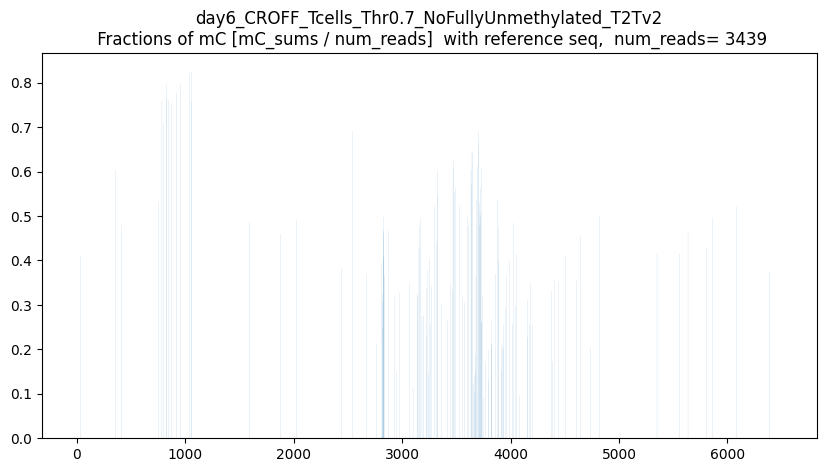

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



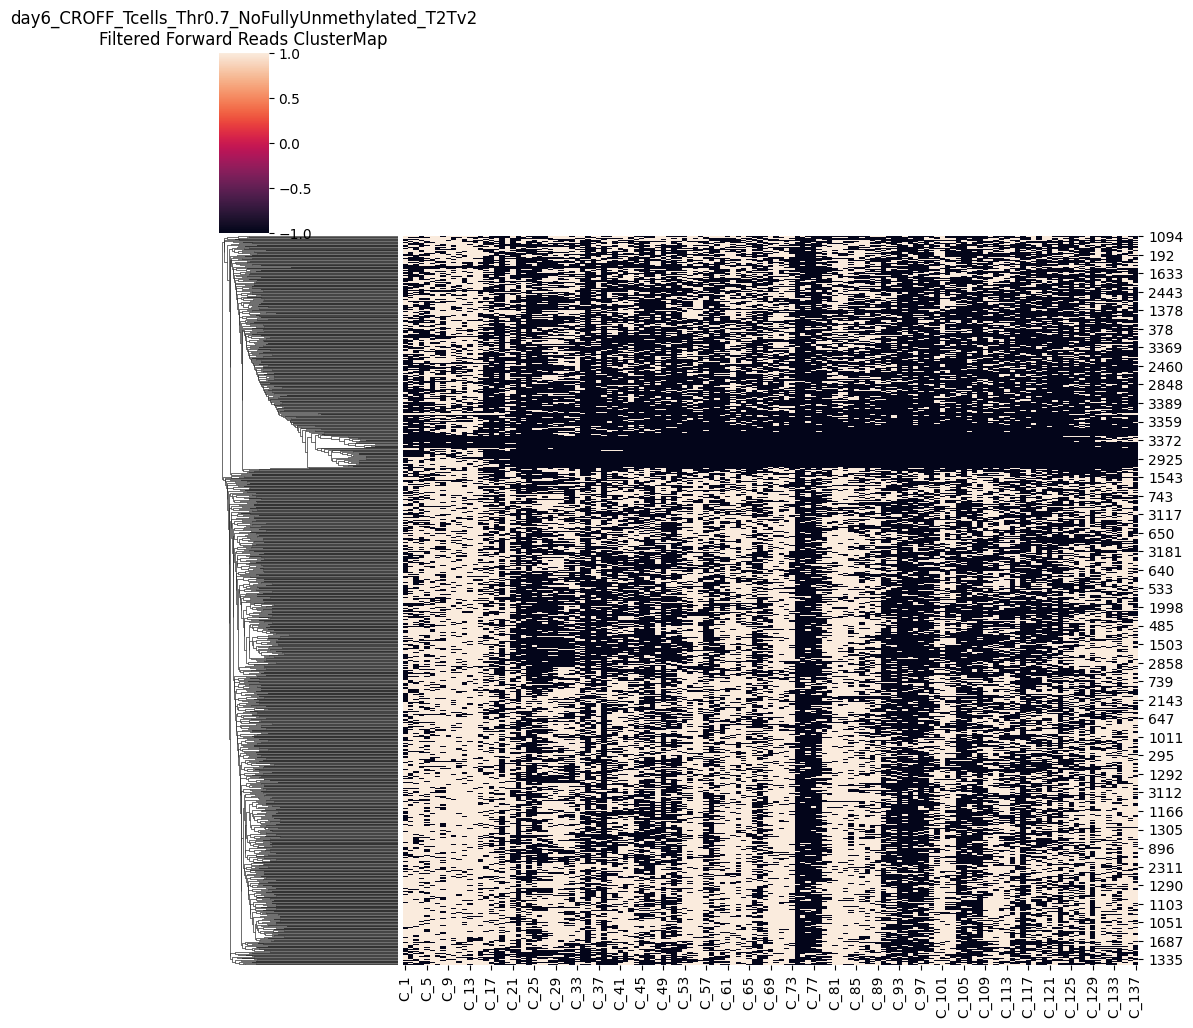

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



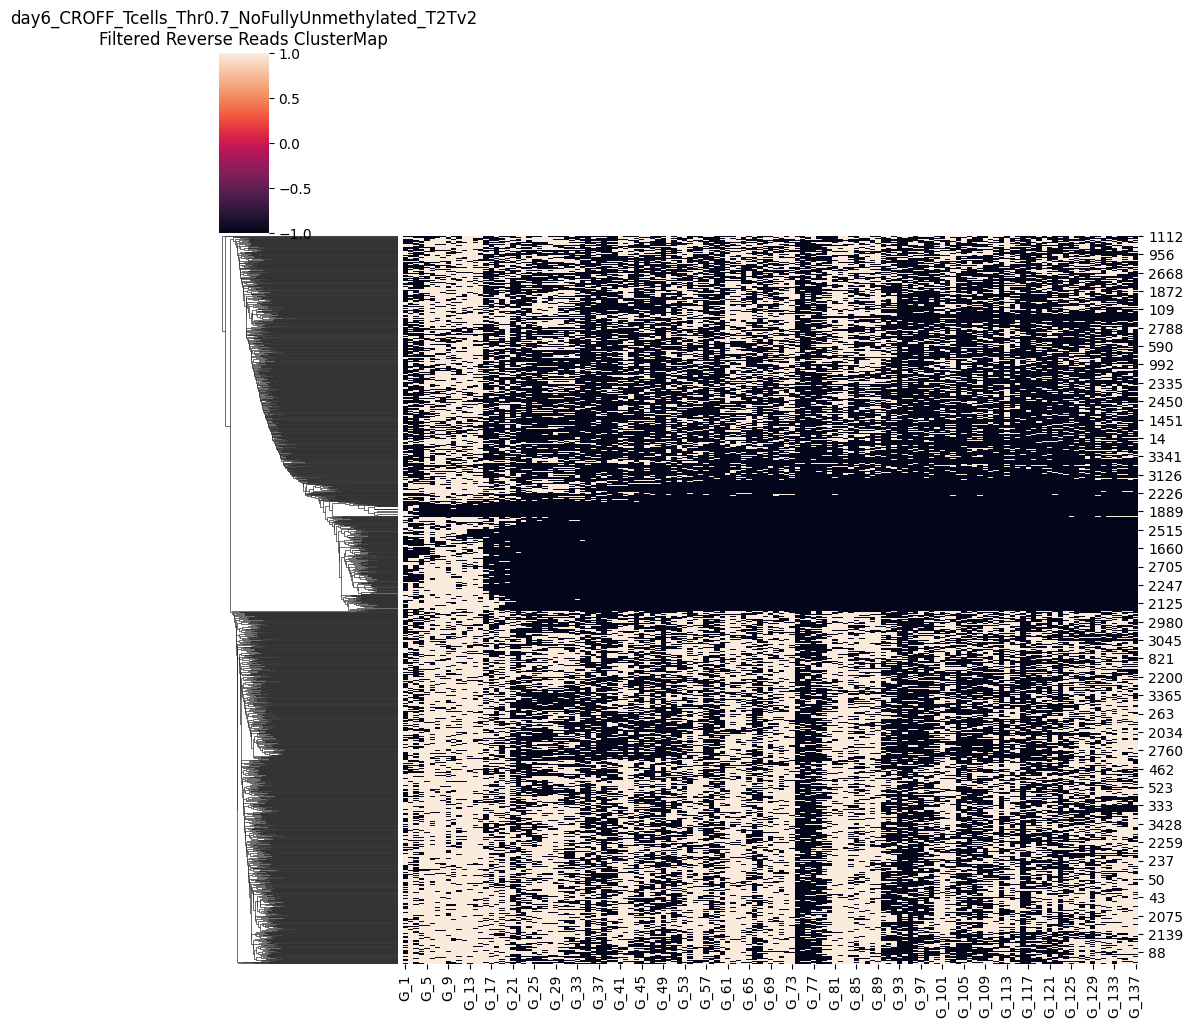

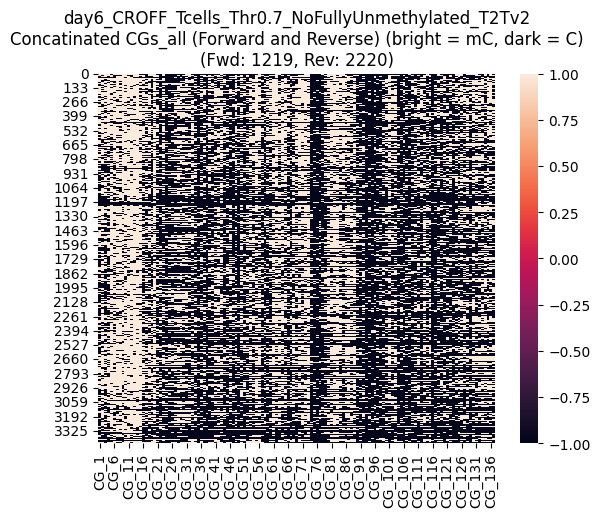

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



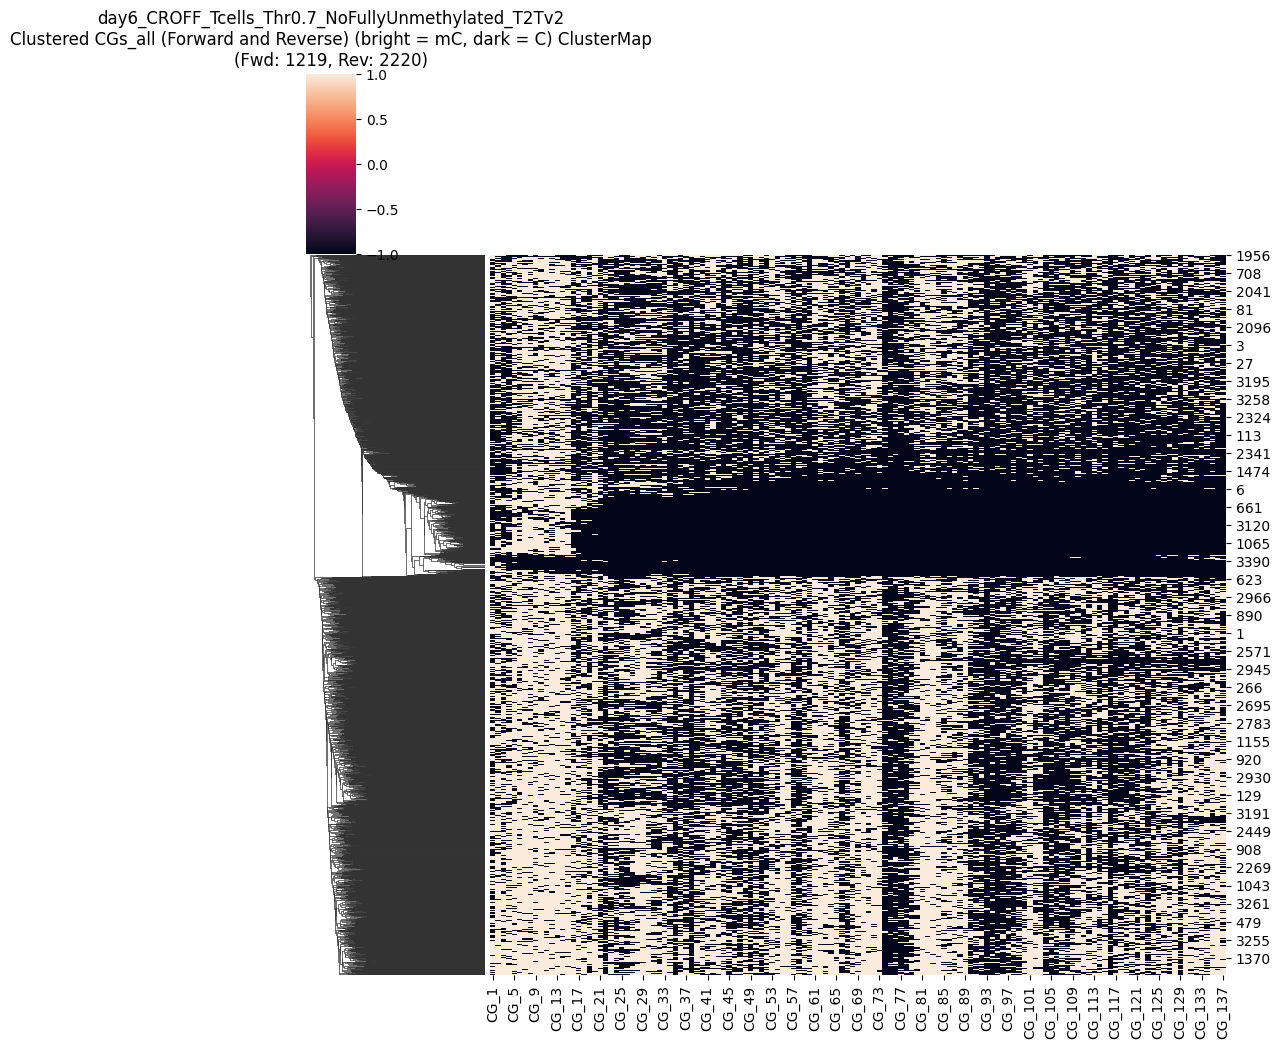

CGs_all saved as CG_137_padded_reads_day6_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-12_units_combined_numFWD1219_numRVS2220.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
1      NaN   1.0   NaN   NaN   NaN   1.0   1.0   1.0   1.0    NaN  ...   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   
3      1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN   1.0    NaN  ...   
4      NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
3434   NaN   1.0   NaN   NaN   1.0   1.0   1.0   1.0   1.0    1.0  ...   
3435   1.0   1.0   NaN   1.0   1.0   NaN   1.0   1.0   1.0    1.0  ...   
3436   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   1.0    NaN  ...   
3437   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   NaN    1.0  ...   
3438   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        1.0     NaN     1.0     NaN     NaN     NaN     NaN     1.0     NaN   
2        NaN     NaN     NaN     NaN     NaN     1.0     NaN     NaN     1.0   
3        1.0     NaN     1.0     NaN     1.0     1.0     NaN     NaN     NaN   
4        1.0     NaN     1.0     1.0     NaN     1.0     1.0     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3434     1.0     1.0     1.0     1.0     NaN     NaN     1.0     1.0     1.0   
3435     1.0     NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0   
3436     1.0     1.0     1.0     1.0     1.0     1.0     NaN     NaN     NaN   
3437     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3438     NaN     NaN     1.0     NaN     NaN     1.0     1.0     NaN     1.0   

      CG_137  
0        1.0  
1        NaN  
2        1.0  
3        NaN  
4        1.0  
...      ...  
3434     NaN  
3435     1.0  
3436     NaN  
3437     NaN  
3438     NaN  

[3439 rows x 137 columns]

In [6]:
keep_full_coverage_reads_only=True
if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
# Processing and visualizing CpG units on forward and reverse strands 
try:

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


CGs_all_silenced_original = CGs_all
CGs_all_silenced_original

# Remove lower than 80% * mean(#mC) methylated reads

In [12]:
threshold_percent = 80
filtered_reads_df, methylation_counts, removed_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 61.0
Maximum methylated CGs per read: 112.0
Threshold (80% of max): 48.80
Original number of reads: 3439
Number of reads after filtering: 2329
Removed 1110 reads


read_name_str read_name read_id_number   mod  \
10      373c9bcd-d515-46bd-a563-982c62c371f9         1              1  CG,0   
11      373c9bcd-d515-46bd-a563-982c62c371f9         1              1  CG,0   
12      373c9bcd-d515-46bd-a563-982c62c371f9         1              1  CG,0   
13      373c9bcd-d515-46bd-a563-982c62c371f9         1              1  CG,0   
14      373c9bcd-d515-46bd-a563-982c62c371f9         1              1  CG,0   
...                                      ...       ...            ...   ...   
492189  e69f0089-29ad-4140-ab60-82a9415a9e5b      9175           9175  CG,0   
492190  e69f0089-29ad-4140-ab60-82a9415a9e5b      9175           9175  CG,0   
492191  e69f0089-29ad-4140-ab60-82a9415a9e5b      9175           9175  CG,0   
492192  e69f0089-29ad-4140-ab60-82a9415a9e5b      9175           9175  CG,0   
492193  e69f0089-29ad-4140-ab60-82a9415a9e5b      9175           9175  CG,0   

         pos  pos_shifted  num_CG_methylated  
10     -3216           34                1.0  
11     -2896          354                1.0  
12     -2499          751                1.0  
13     -2466          784                1.0  
14     -2452          798                1.0  
...      ...          ...                ...  
492189  2305         5555                1.0  
492190  2387         5637                1.0  
492191  2609         5859                1.0  
492192  2833         6083                1.0  
492193  3142         6392                1.0  

[163989 rows x 7 columns]

In [13]:
removed_reads_df

read_name_str read_name read_id_number   mod  \
372     70c1f9d2-1e15-457e-b05d-d42f616c2ffc         7              7  CG,0   
373     89d7000c-3223-492a-8971-049579096c2c         8              8  CG,0   
374     89d7000c-3223-492a-8971-049579096c2c         8              8  CG,0   
375     89d7000c-3223-492a-8971-049579096c2c         8              8  CG,0   
376     89d7000c-3223-492a-8971-049579096c2c         8              8  CG,0   
...                                      ...       ...            ...   ...   
513501  23892951-67b1-47ea-8153-791c774f5455      9998           9998  CG,0   
513502  23892951-67b1-47ea-8153-791c774f5455      9998           9998  CG,0   
513529  a6964aa8-86ec-4c7b-b4cd-9d0d1278220d     10008          10008  CG,0   
513530  a6964aa8-86ec-4c7b-b4cd-9d0d1278220d     10008          10008  CG,0   
513531  a6964aa8-86ec-4c7b-b4cd-9d0d1278220d     10008          10008  CG,0   

         pos  pos_shifted  num_CG_methylated  
372     2609         5859                1.0  
373    -2466          784                1.0  
374    -2452          798                1.0  
375    -2425          825                1.0  
376    -2402          848                1.0  
...      ...          ...                ...  
513501  2833         6083                1.0  
513502  3142         6392                1.0  
513529  2387         5637                1.0  
513530  2833         6083                1.0  
513531  3142         6392                1.0  

[29226 rows x 7 columns]

In [ ]:
# output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
# removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
# output_bam_path=Path(output_dir_path, removed_reads_bam_name)
# output_bam_path

In [11]:
output_bam_path = subset_BAM_by_read_IDs(bam_path, removed_reads_df, output_bam_path=None, index_output=True)
output_bam_path

Subset BAM written to: /home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.subset_by_remove_reads.bam
Index written to: /home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.subset_by_remove_reads.bam.bai


PosixPath('/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.subset_by_remove_reads.bam')

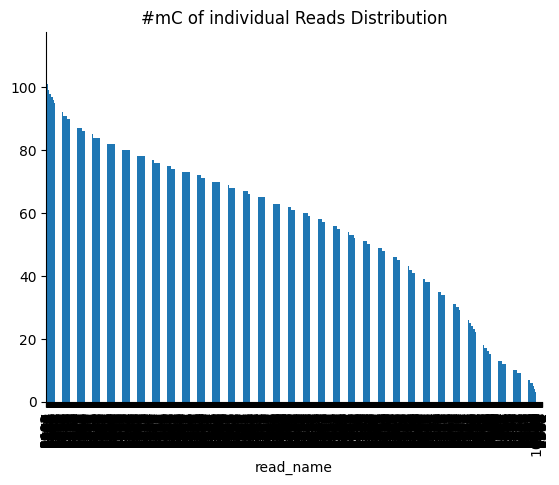

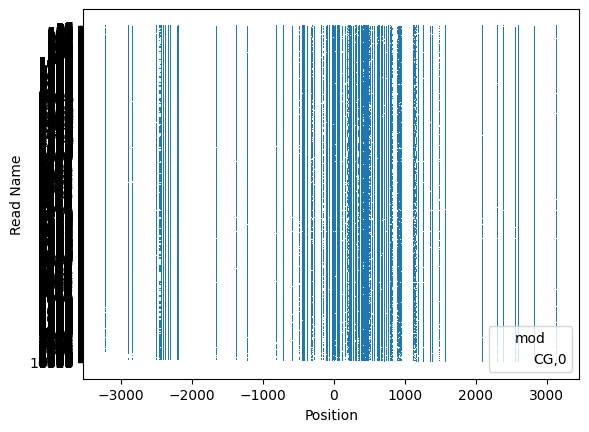

In [14]:
visualize_data(reads_df)

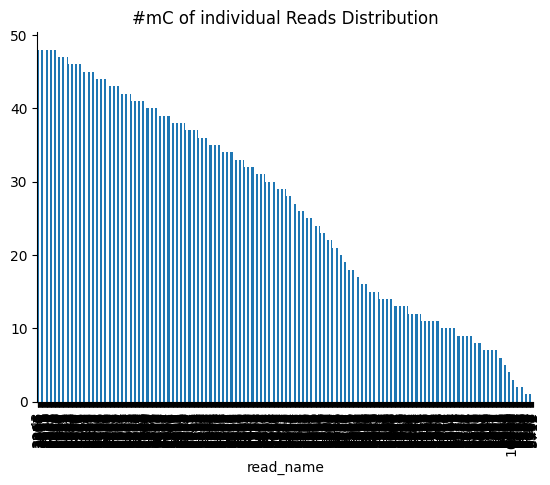

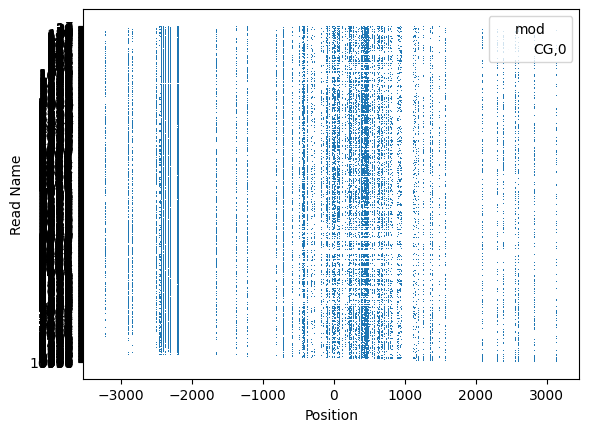

In [15]:
visualize_data(remove_reads_df)

In [17]:
output_bam_path

PosixPath('/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.subset_by_remove_reads.bam')

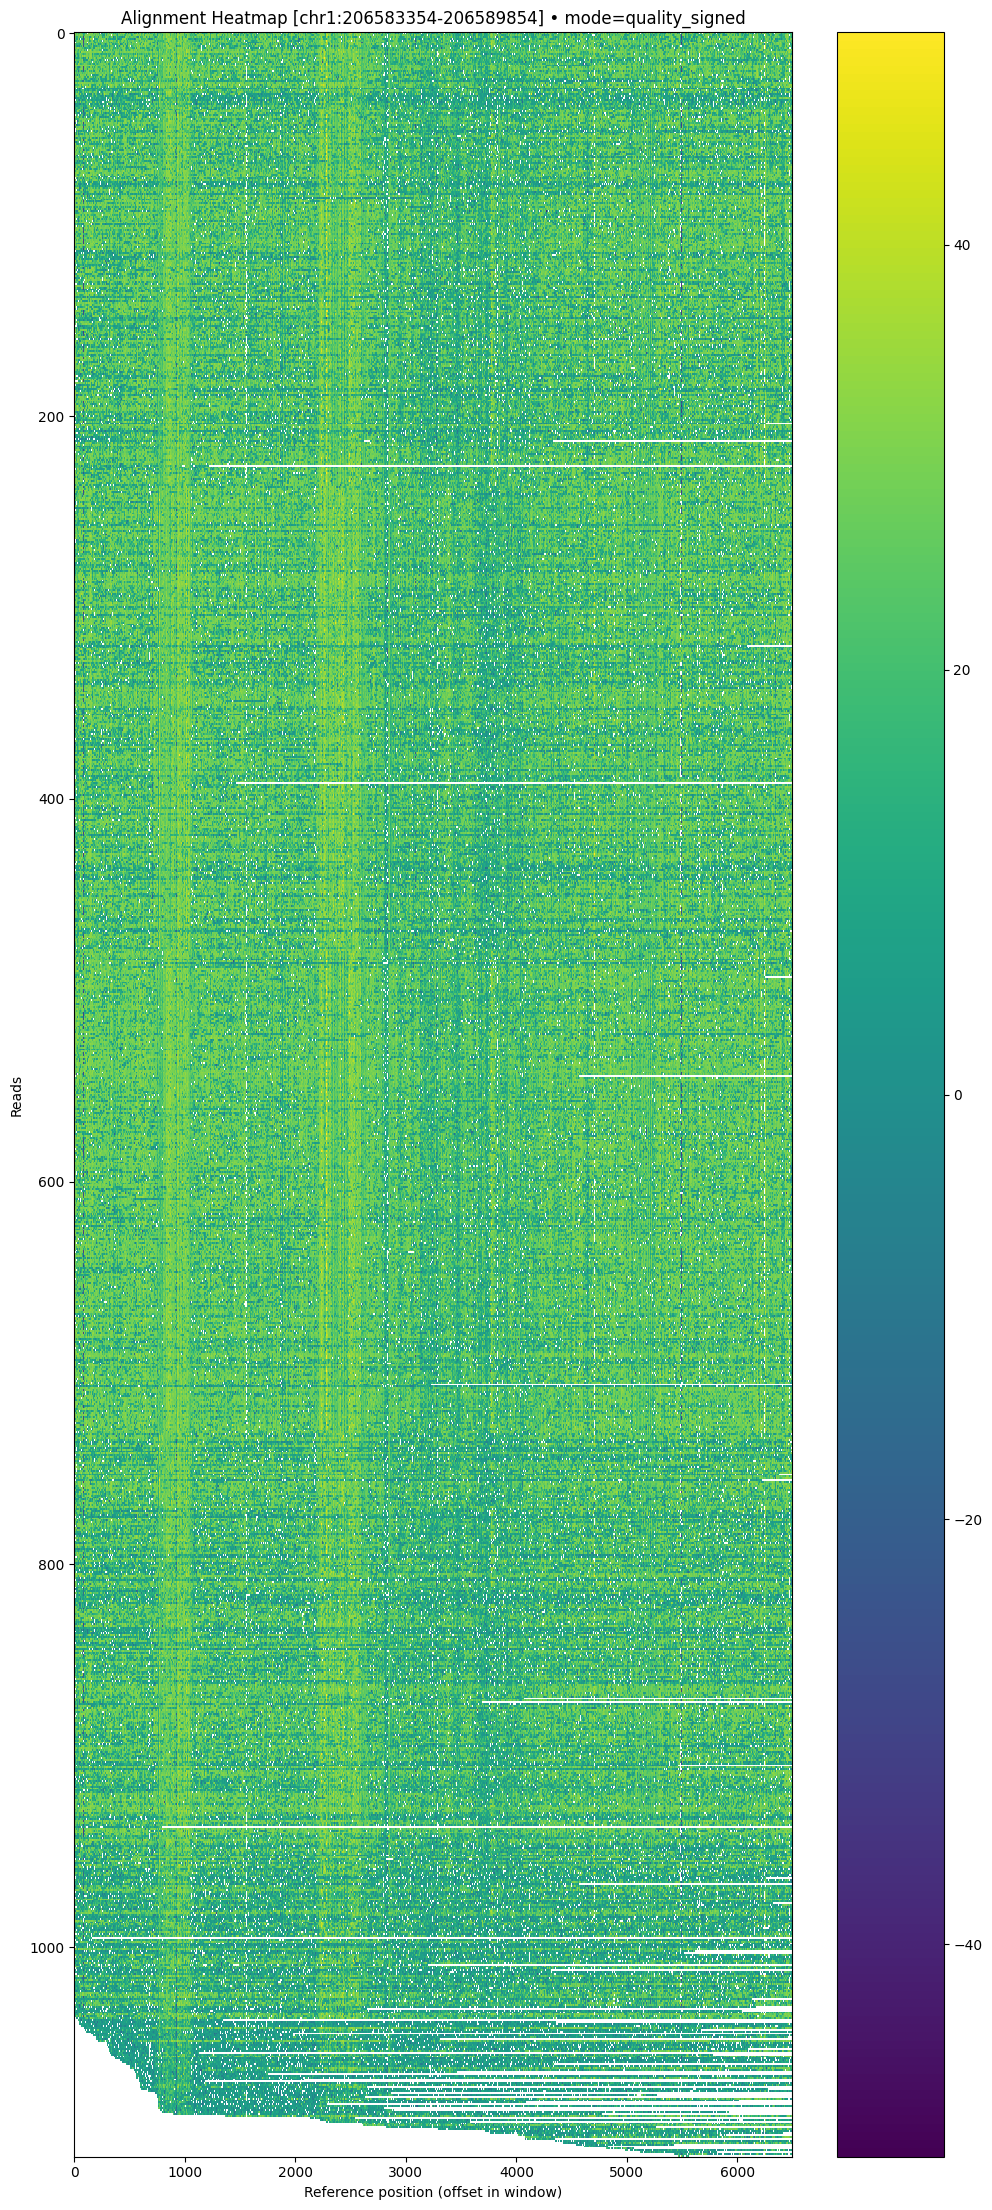

In [16]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = output_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)


Mean methylated CGs per read: 61.0
Maximum methylated CGs per read: 112.0
Threshold (80% of max): 48.80
Original number of reads: 3439
Number of reads after filtering: 2329
Removed 1110 reads


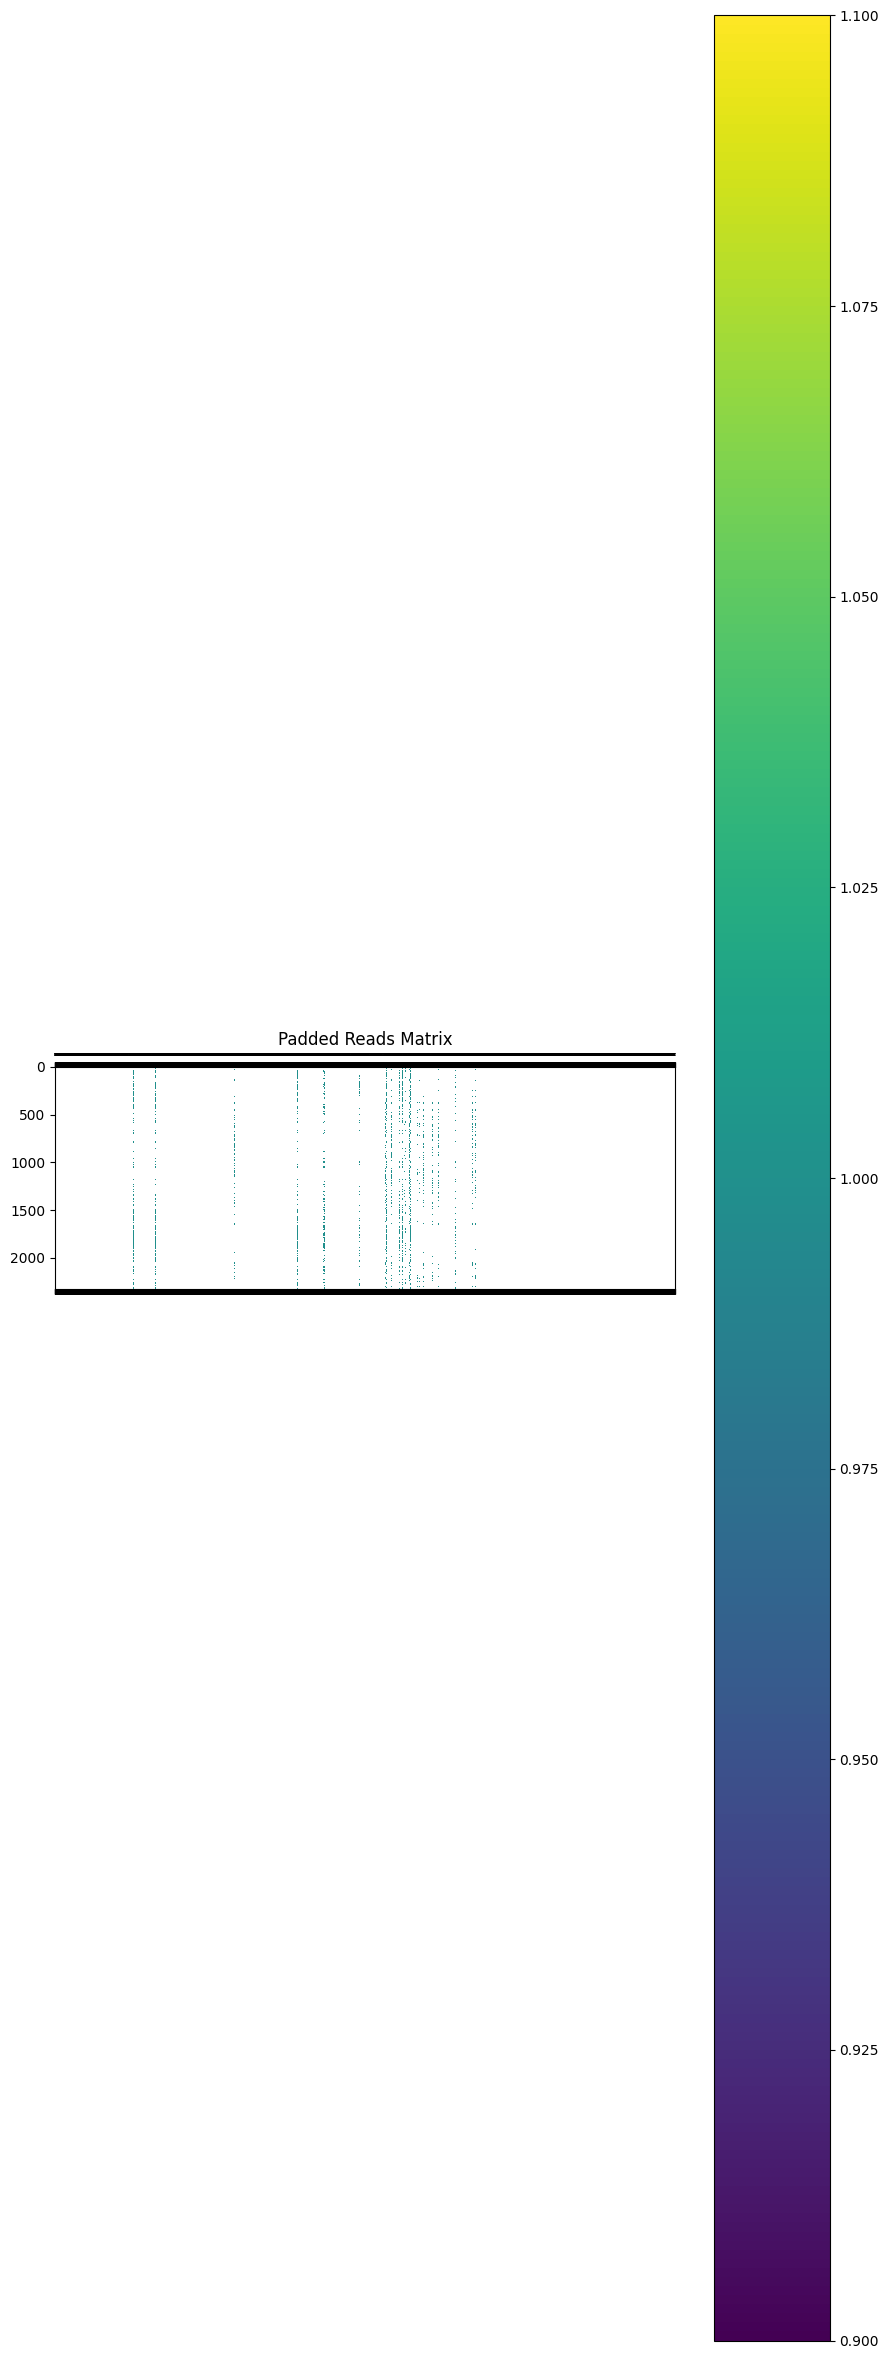

Padded reads saved to removed_low80_methylated_padded_reads_day6_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-12.npy
Padded reads loaded successfully.


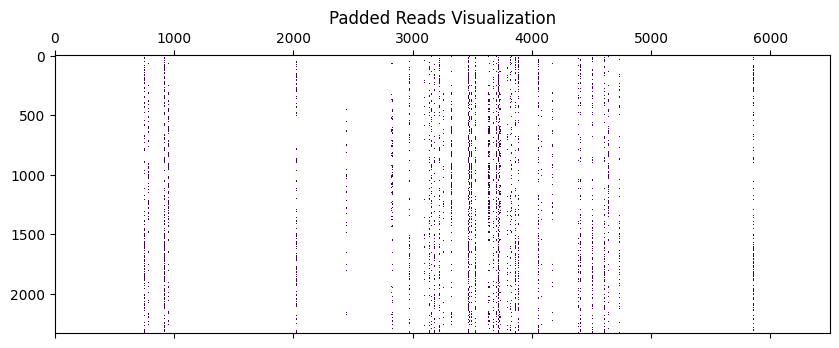

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

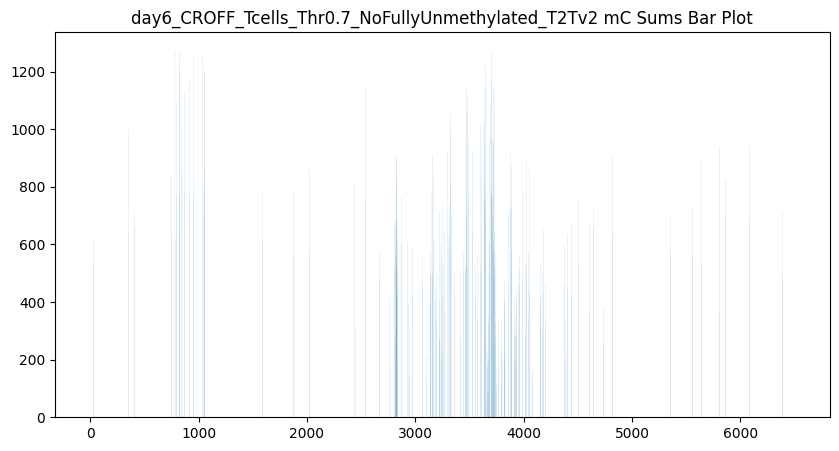

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


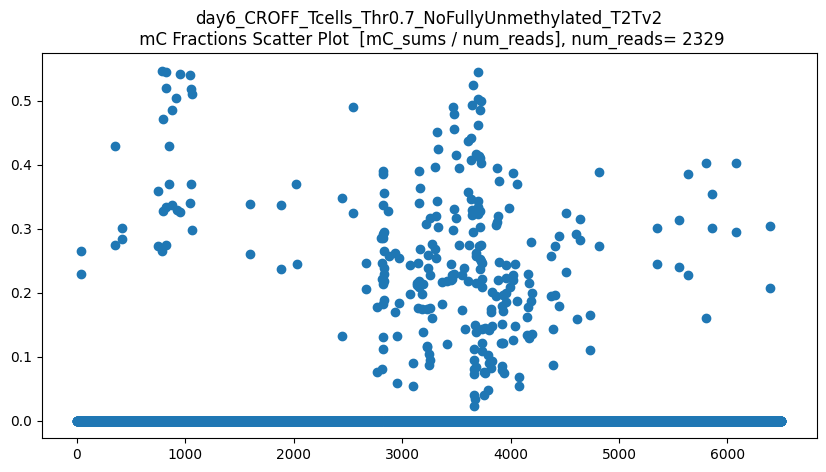

len(CGs_all) = 2329
CGs_all.shape = (2329, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


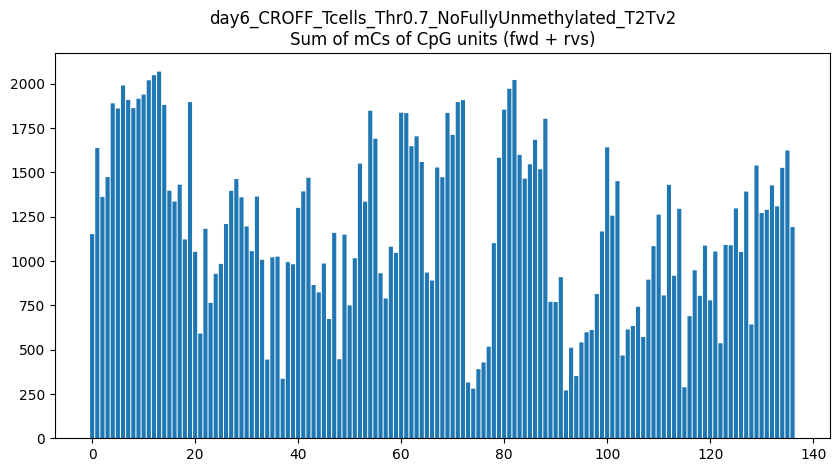

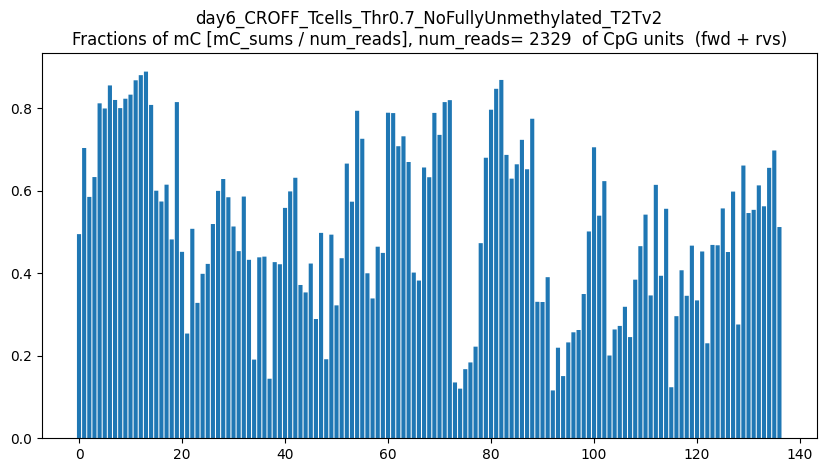

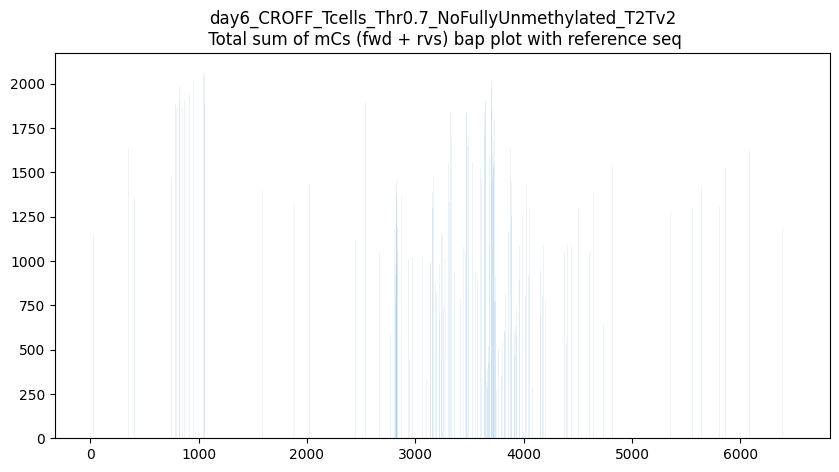

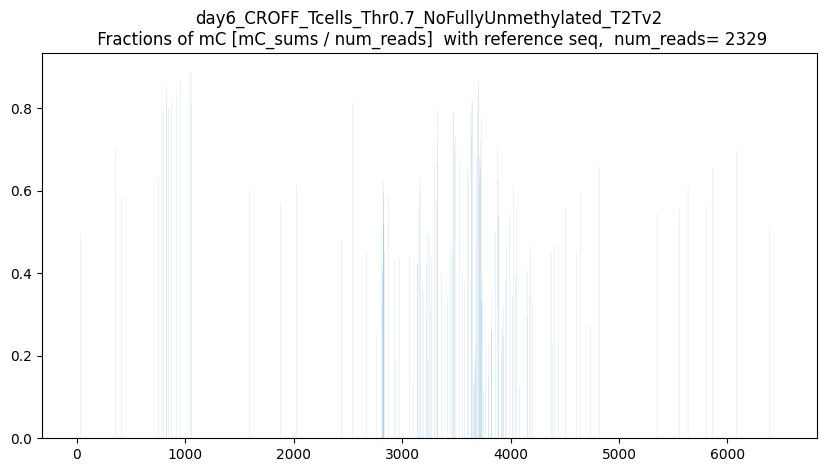

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



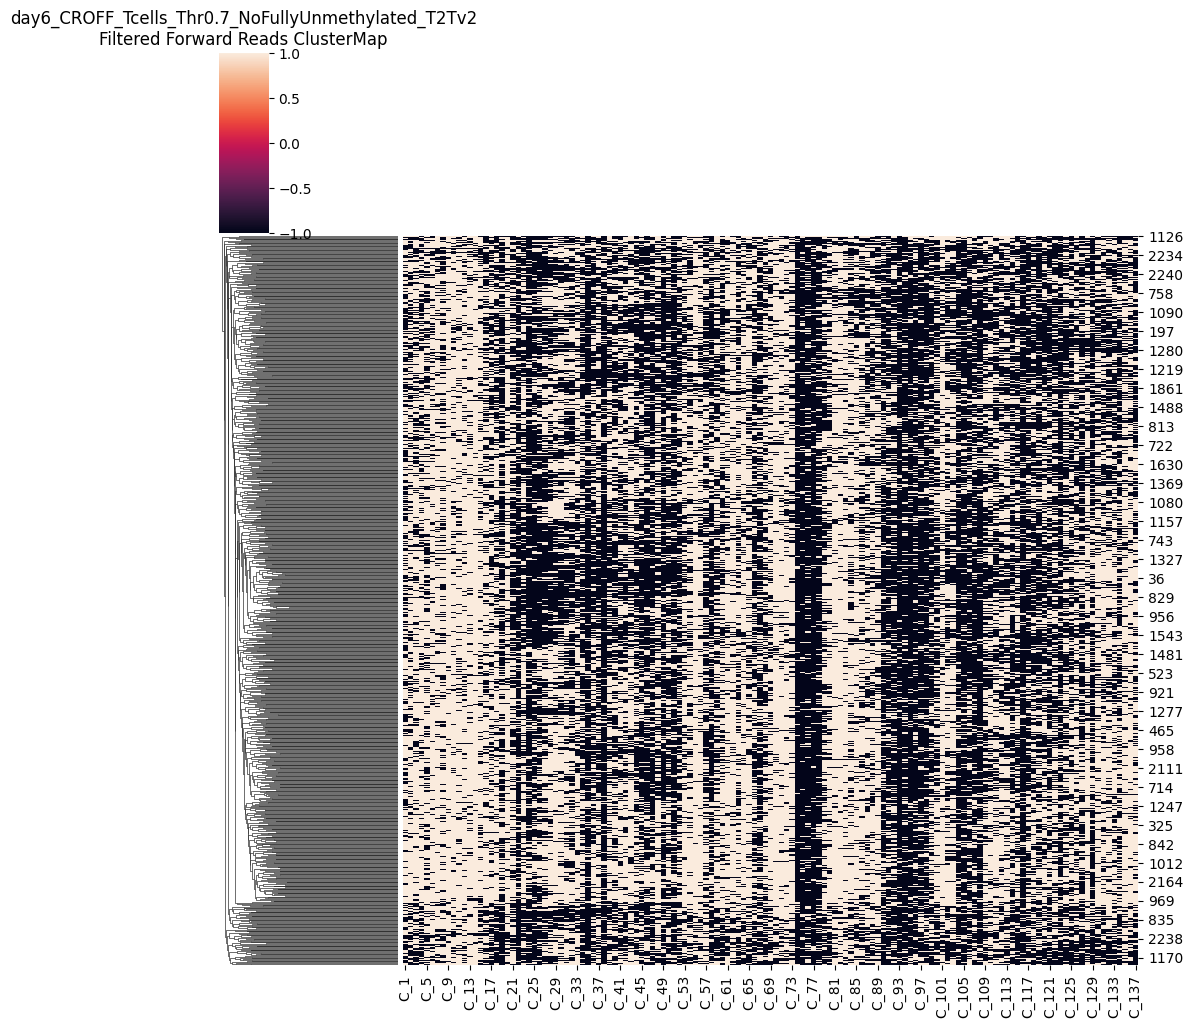

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



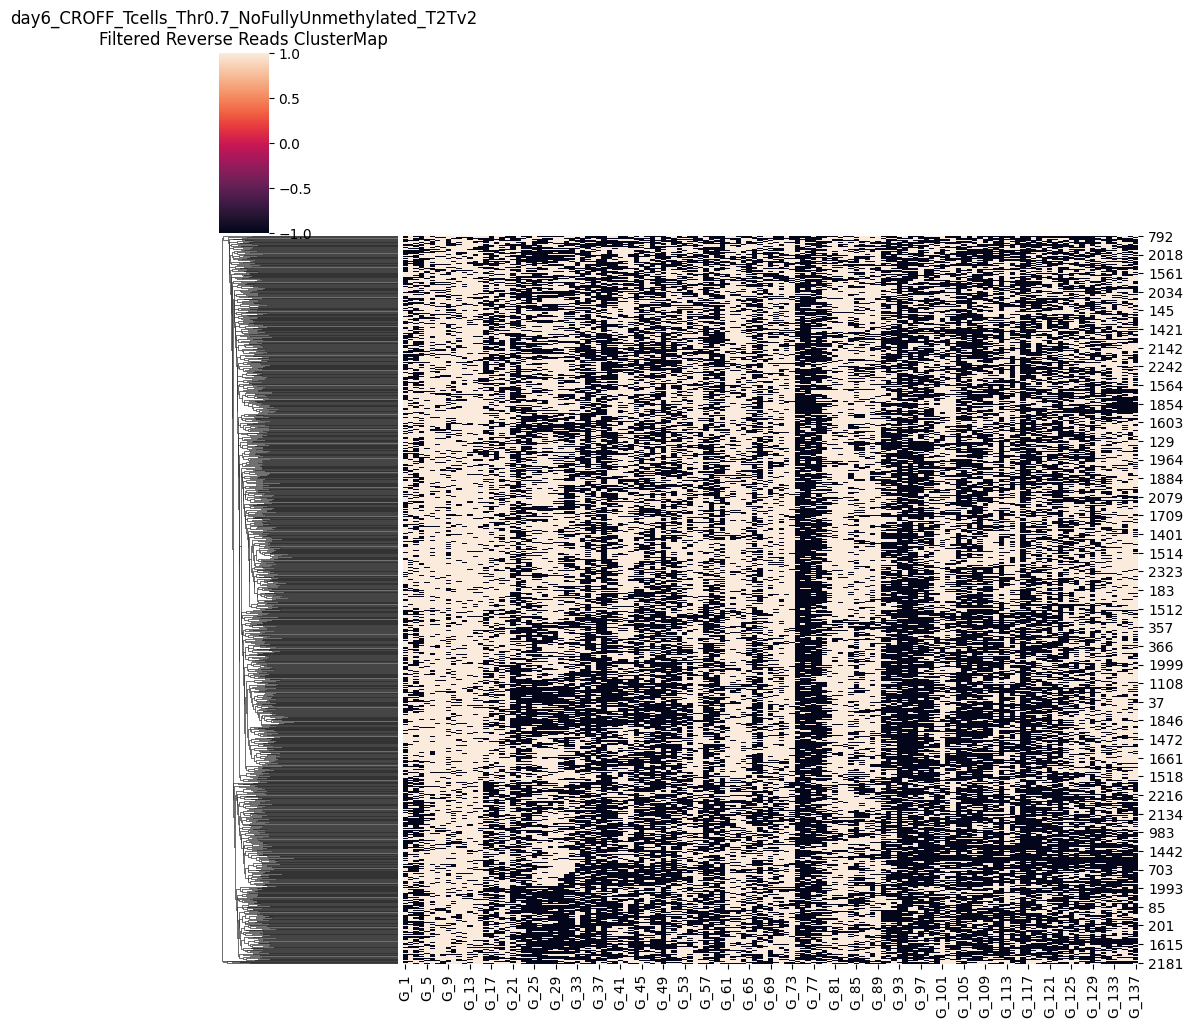

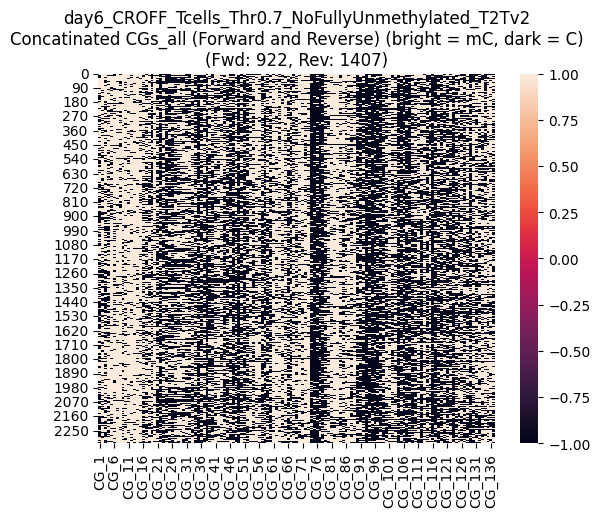

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



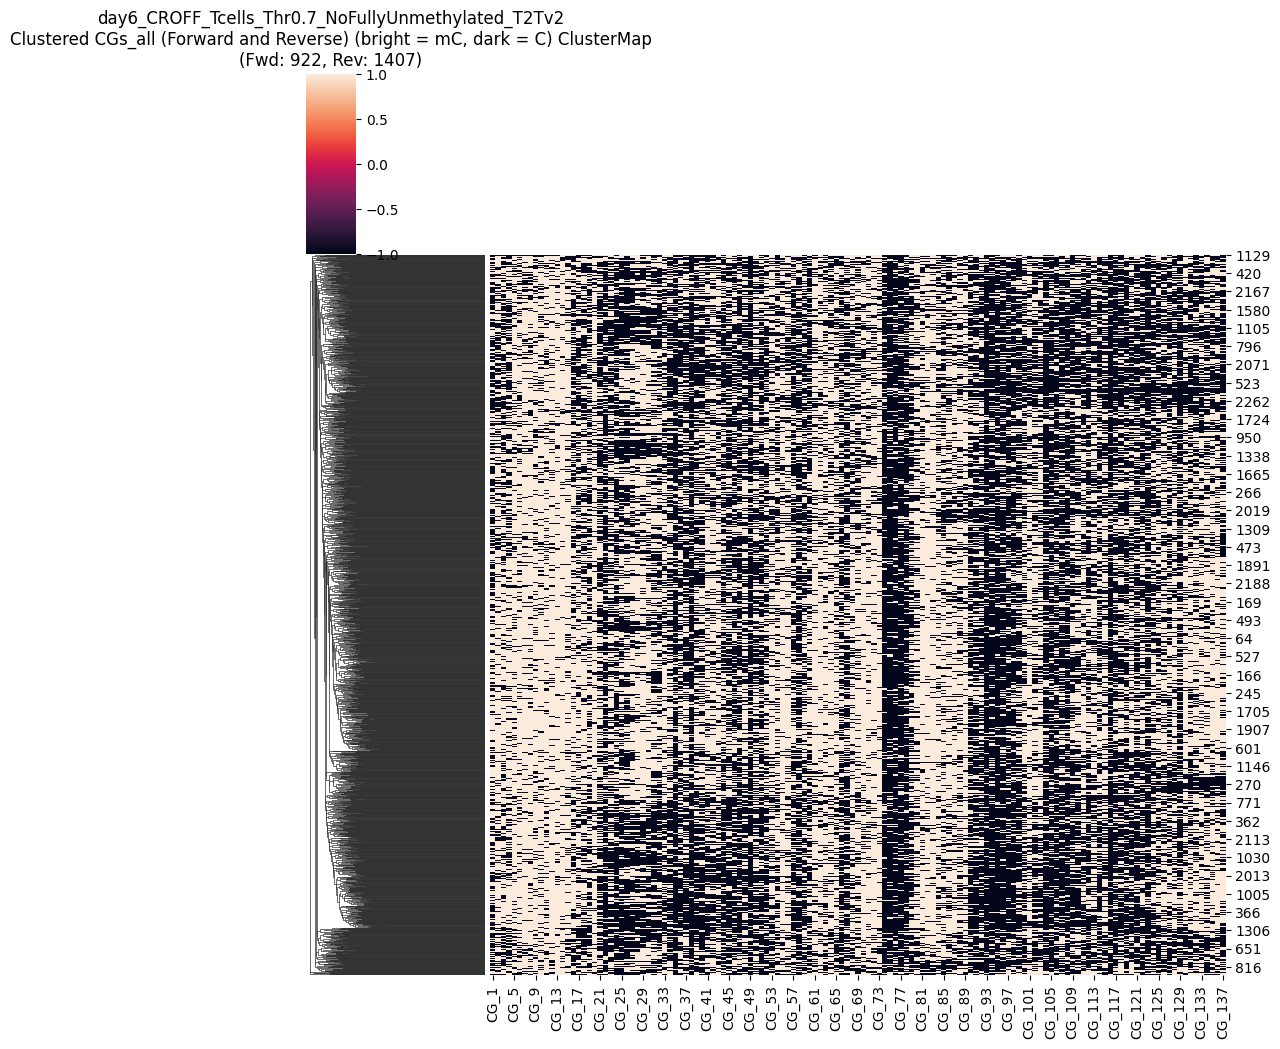

CGs_all saved as CG_137_removed_low80_methylated_padded_reads_day6_CROFF_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-08-12_units_combined_numFWD922_numRVS1407.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


CG_1  CG_2  CG_3  CG_4  CG_5  CG_6  CG_7  CG_8  CG_9  CG_10  ...  \
0      1.0   1.0   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
1      NaN   1.0   NaN   NaN   NaN   1.0   1.0   1.0   1.0    NaN  ...   
2      1.0   1.0   1.0   1.0   NaN   1.0   1.0   NaN   1.0    NaN  ...   
3      NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   
4      NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   1.0    1.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
2324   NaN   1.0   NaN   1.0   1.0   NaN   1.0   1.0   1.0    1.0  ...   
2325   NaN   1.0   NaN   NaN   1.0   1.0   1.0   1.0   1.0    1.0  ...   
2326   1.0   1.0   NaN   1.0   1.0   NaN   1.0   1.0   1.0    1.0  ...   
2327   1.0   1.0   1.0   1.0   1.0   NaN   1.0   1.0   1.0    NaN  ...   
2328   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   1.0    1.0  ...   

      CG_128  CG_129  CG_130  CG_131  CG_132  CG_133  CG_134  CG_135  CG_136  \
0        NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0     NaN   
1        1.0     NaN     1.0     NaN     NaN     NaN     NaN     1.0     NaN   
2        1.0     NaN     1.0     NaN     1.0     1.0     NaN     NaN     NaN   
3        1.0     NaN     1.0     1.0     NaN     1.0     1.0     1.0     1.0   
4        NaN     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2324     NaN     NaN     NaN     NaN     NaN     1.0     1.0     1.0     1.0   
2325     1.0     1.0     1.0     1.0     NaN     NaN     1.0     1.0     1.0   
2326     1.0     NaN     NaN     1.0     1.0     1.0     1.0     NaN     1.0   
2327     1.0     1.0     1.0     1.0     1.0     1.0     NaN     NaN     NaN   
2328     NaN     NaN     1.0     NaN     NaN     1.0     1.0     NaN     1.0   

      CG_137  
0        1.0  
1        NaN  
2        NaN  
3        1.0  
4        1.0  
...      ...  
2324     NaN  
2325     NaN  
2326     1.0  
2327     NaN  
2328     NaN  

[2329 rows x 137 columns]

In [7]:


save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_silenced_remove_low80 = CGs_all
CGs_all_silenced_remove_low80

# Remove lower than 70% * mean(#mC) methylated reads

In [ ]:
threshold_percent = 70
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [31]:
# Remove lower than 50% * mean(#mC) methylated reads

In [ ]:
threshold_percent = 50
filtered_reads_df, methylation_counts = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

save_padded_reads_name_np_remove_low_methylated = 'removed_low'+str(threshold_percent)+'_methylated_' + save_padded_reads_name_np

padded_reads = create_padded_reads(filtered_reads_df, regions_dict, region_length)
if padded_reads is not None:
    plot_padded_reads(padded_reads, ref_seq_list)
    save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np_remove_low_methylated)


# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np_remove_low_methylated, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")

CGs_all_silenced_remove_low50 = CGs_all
CGs_all_silenced_remove_low50

In [ ]:
CGs_all

In [ ]:
CGs_all_silenced_remove_low80 = CGs_all
CGs_all_silenced_remove_low80

# Compare frequencies

In [ ]:
# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_cut.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_cut) 

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_cut.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_cut) 

# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='Silenced')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='Unedited')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# CGs_all_silenced_remove_low80 vs. CGs_all_silenced_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_silenced_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_silenced_remove_low80) 


# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# CGs_all_silenced_remove_low80 vs. CGs_all_silenced_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_silenced_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_silenced_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_silenced_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# CGs_all_silenced_remove_low80 vs. CGs_all_silenced_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums #/ len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_silenced_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums #/ len(CGs_all_silenced_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_silenced_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums #/ len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut


plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
CGs_all_unedited_remove_low80
CGs_all_unedited_remove_low50 

In [ ]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [63]:
plt.show()

In [ ]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  #/ len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  #/ len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums # / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  #/ len(CGs_all_silenced_remove_low50) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  #/ len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums # / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut



plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
CGs_all_unedited_remove_low70

In [ ]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  #/ len(CGs_all_silenced_remove_low50) 


CGs_all_unedited_remove_low70_sums = np.nansum(CGs_all_unedited_remove_low70.values, axis=0) 
CGs_all_unedited_remove_low70_frac = CGs_all_unedited_remove_low70_sums  #/ len(CGs_all_unedited_remove_low70) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  #/ len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums # / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut



plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')

plt.bar(np.arange(len(CGs_all_unedited_remove_low70_sums)), CGs_all_unedited_remove_low70_frac, snap=False, alpha=0.5, label='>70% * mean')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# CGs_all_unedited_remove_low80 vs. CGs_all_unedited_remove_low50 

# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_silenced_cut_sums = np.nansum(CGs_all_unedited_remove_low50.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums  /len(CGs_all_silenced_remove_low50) 


CGs_all_unedited_remove_low70_sums = np.nansum(CGs_all_unedited_remove_low70.values, axis=0) 
CGs_all_unedited_remove_low70_frac = CGs_all_unedited_remove_low70_sums  / len(CGs_all_unedited_remove_low70) 

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_remove_low80.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums  / len(CGs_all_unedited_remove_low80) 


CGs_all_silenced_full_sums = np.nansum(CGs_all_unedited_original.values, axis=0) 
CGs_all_silenced_full_frac = CGs_all_silenced_full_sums / len(CGs_all_silenced_original) 



# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut



plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='>80% * mean')
plt.bar(np.arange(len(CGs_all_unedited_remove_low70_sums)), CGs_all_unedited_remove_low70_frac, snap=False, alpha=0.5, label='>70% * mean')
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='>50% * mean')
plt.bar(np.arange(len(CGs_all_silenced_full_sums)), CGs_all_silenced_full_frac, snap=False, alpha=0.5, label='original')


# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs')
plt.legend()

# Show the plot
plt.show()